<a href="https://colab.research.google.com/github/bhanupriya9916/bhanu121998/blob/main/ASSIGNMENTS_FORCASTING_AIRLINES%2BDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Forecasting Model For Airlines Passengers data set

## Data Description:

- Month :	month of the year: 'jan' to 'dec'
- Passengers : no of passengers

## Attaching Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,3)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3000x750 with 0 Axes>

### Adding Dataset

In [2]:
al = pd.read_excel('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/Assignment_18_Forecasting/Dataset/Airlines%2BData.xlsx')
al.rename({'Month':'Date'}, axis=1, inplace=True)

al

Date  Passengers
0  1995-01-01         112
1  1995-02-01         118
2  1995-03-01         132
3  1995-04-01         129
4  1995-05-01         121
..        ...         ...
91 2002-08-01         405
92 2002-09-01         355
93 2002-10-01         306
94 2002-11-01         271
95 2002-12-01         306

[96 rows x 2 columns]

## Performing EDA In Dataset

### Applying Descriptive Statistics

In [3]:
al.describe()

Passengers
count   96.000000
mean   213.708333
std     71.918216
min    104.000000
25%    156.000000
50%    200.000000
75%    264.750000
max    413.000000

In [4]:
al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
al.isna().sum()

Date          0
Passengers    0
dtype: int64

In [6]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
                str(len(df[df.columns[i]].unique())))


In [7]:
uni(al)


 All Unique Value in Date
['1995-01-01T00:00:00.000000000' '1995-02-01T00:00:00.000000000'
 '1995-03-01T00:00:00.000000000' '1995-04-01T00:00:00.000000000'
 '1995-05-01T00:00:00.000000000' '1995-06-01T00:00:00.000000000'
 '1995-07-01T00:00:00.000000000' '1995-08-01T00:00:00.000000000'
 '1995-09-01T00:00:00.000000000' '1995-10-01T00:00:00.000000000'
 '1995-11-01T00:00:00.000000000' '1995-12-01T00:00:00.000000000'
 '1996-01-01T00:00:00.000000000' '1996-02-01T00:00:00.000000000'
 '1996-03-01T00:00:00.000000000' '1996-04-01T00:00:00.000000000'
 '1996-05-01T00:00:00.000000000' '1996-06-01T00:00:00.000000000'
 '1996-07-01T00:00:00.000000000' '1996-08-01T00:00:00.000000000'
 '1996-09-01T00:00:00.000000000' '1996-10-01T00:00:00.000000000'
 '1996-11-01T00:00:00.000000000' '1996-12-01T00:00:00.000000000'
 '1997-01-01T00:00:00.000000000' '1997-02-01T00:00:00.000000000'
 '1997-03-01T00:00:00.000000000' '1997-04-01T00:00:00.000000000'
 '1997-05-01T00:00:00.000000000' '1997-06-01T00:00:00.000000000

### Separating Month and Year into Separate Column

In [8]:
al["month"] = al.Date.dt.strftime("%b")
al["year"]  = al.Date.dt.strftime("%Y")

al.head(10)

Date  Passengers month  year
0 1995-01-01         112   Jan  1995
1 1995-02-01         118   Feb  1995
2 1995-03-01         132   Mar  1995
3 1995-04-01         129   Apr  1995
4 1995-05-01         121   May  1995
5 1995-06-01         135   Jun  1995
6 1995-07-01         148   Jul  1995
7 1995-08-01         148   Aug  1995
8 1995-09-01         136   Sep  1995
9 1995-10-01         119   Oct  1995

In [9]:
hm_y_m = pd.pivot_table(data=al,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)

hm_y_m

month  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
year                                                             
1995   129  148  118  118  112  148  135  132  121  104  119  136
1996   135  170  140  126  115  170  149  141  125  114  133  158
1997   163  199  166  150  145  199  178  178  172  146  162  184
1998   181  242  194  180  171  230  218  193  183  172  191  209
1999   235  272  201  196  196  264  243  236  229  180  211  237
2000   227  293  229  188  204  302  264  235  234  203  229  259
2001   269  347  278  233  242  364  315  267  270  237  274  312
2002   313  405  306  277  284  413  374  317  318  271  306  355

### Visualizing The Data

#### Using Subplots For Visualizing

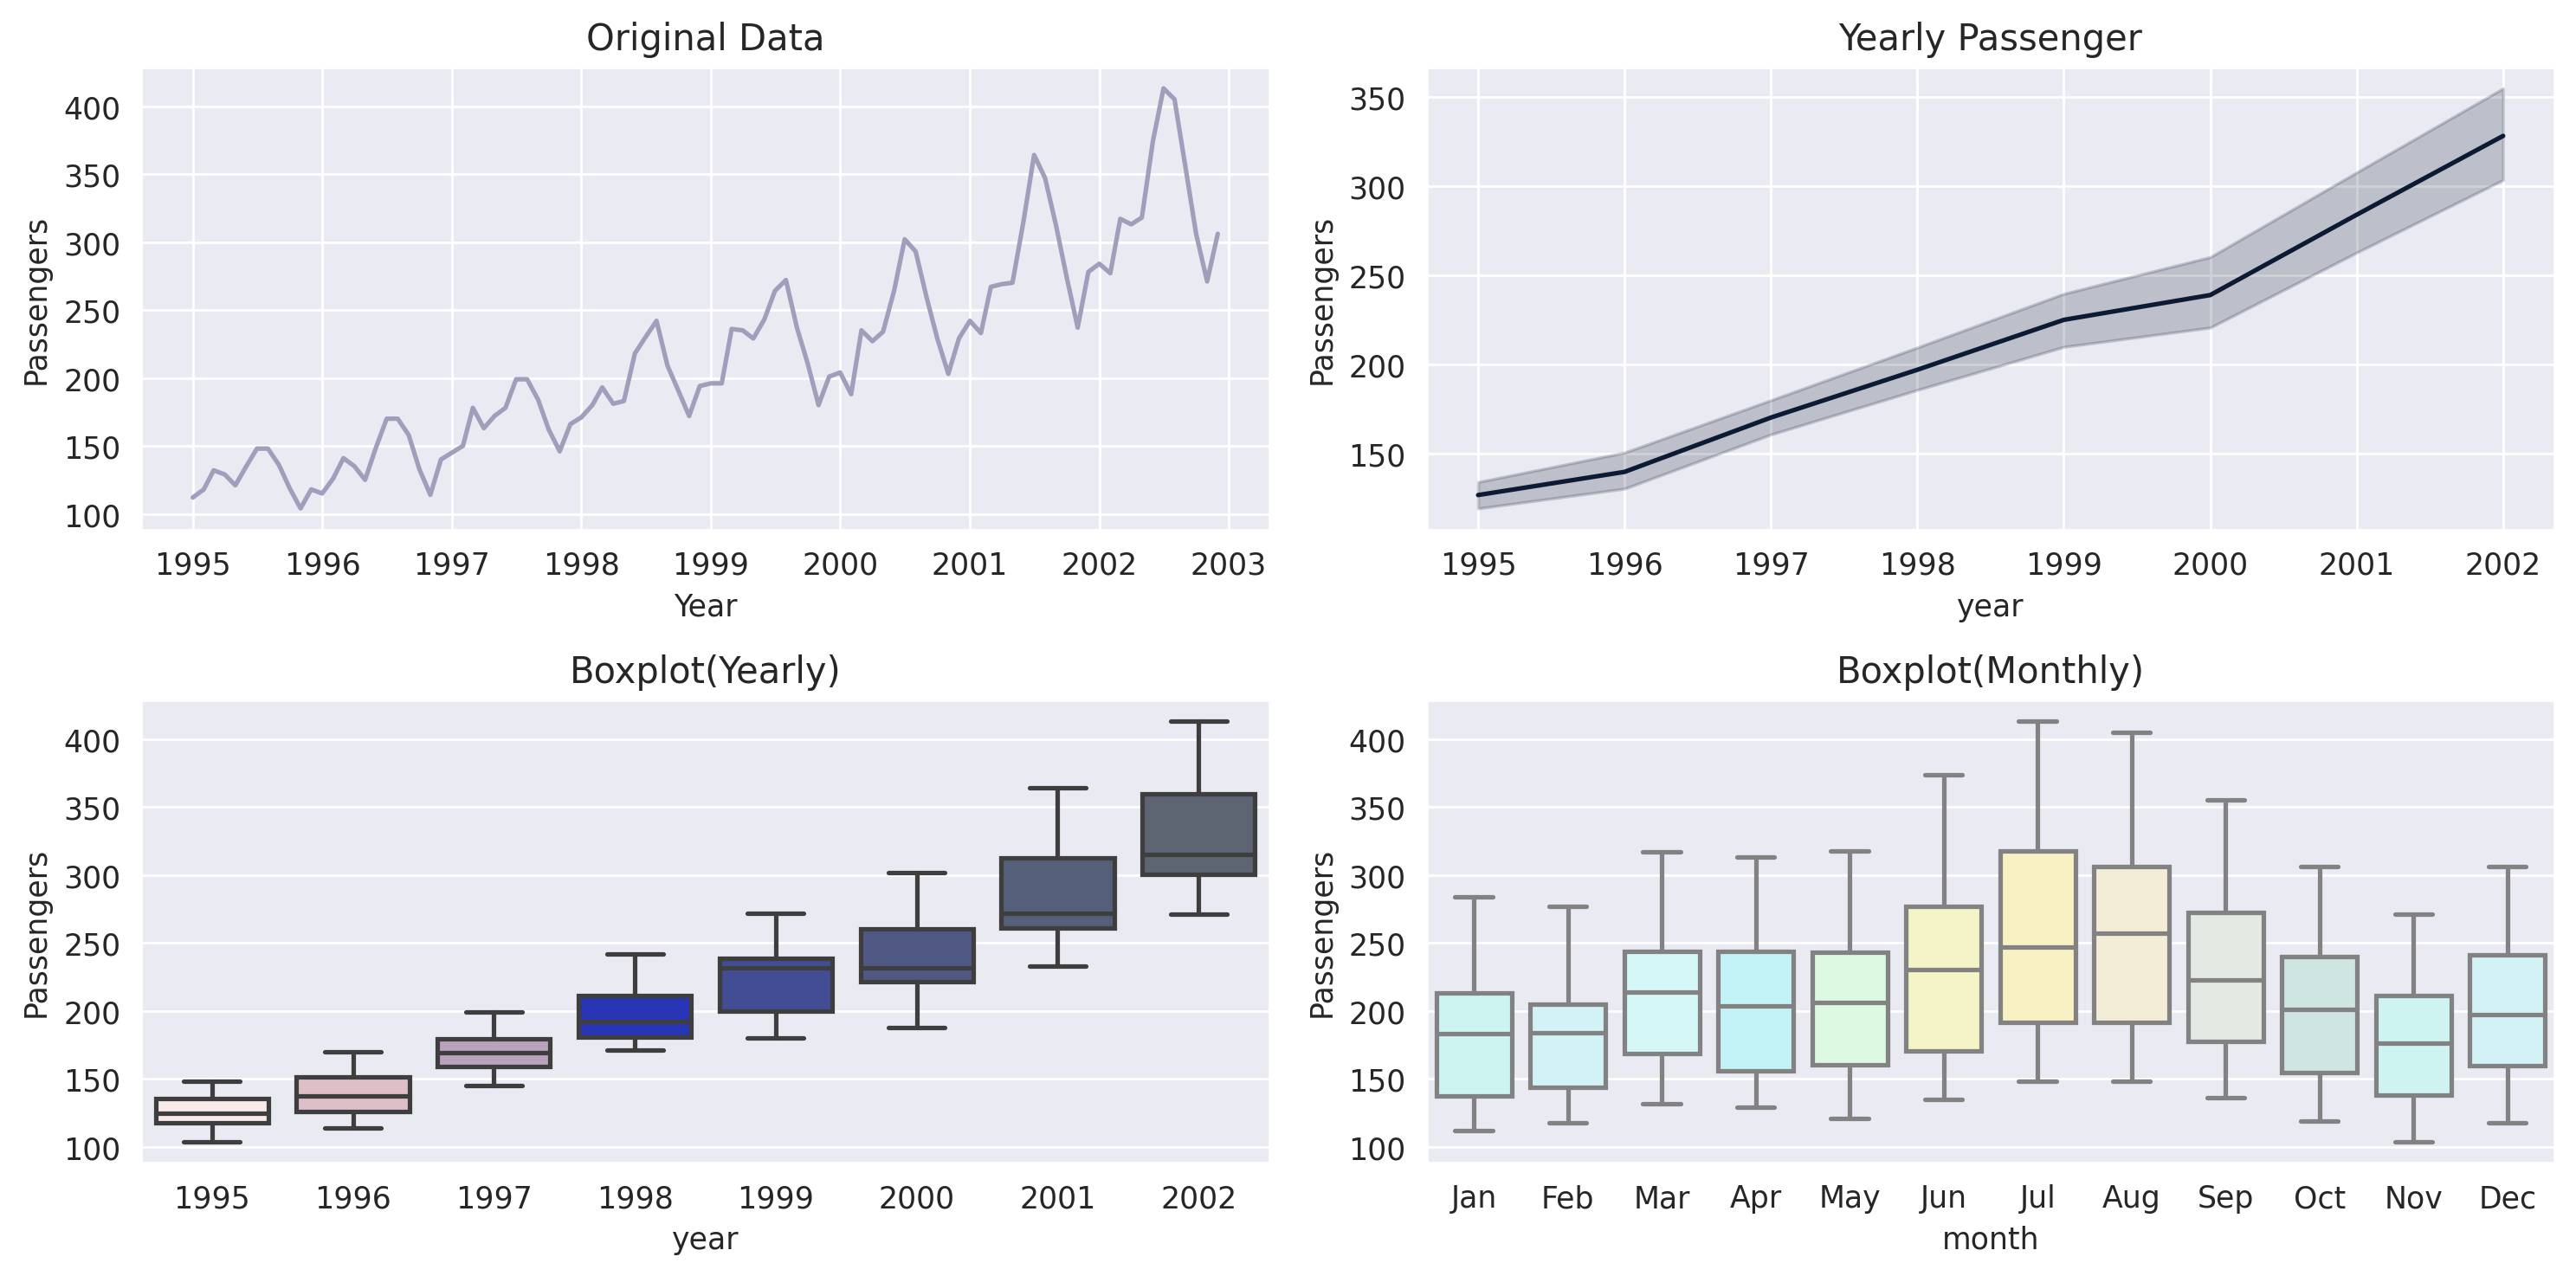

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))

plt.setp(ax[0, 0], title = 'Original Data')
plt.setp(ax[0, 0], xlabel='Year')
sns.lineplot(x = al['Date'], y = al['Passengers'], ax = ax[0, 0], color = '#a09ebb')

plt.setp(ax[0, 1], title = 'Yearly Passenger')
sns.lineplot(x=al['year'],y=al['Passengers'], ax = ax[0, 1] , color = "#0c1b33")

ax[1, 0].title.set_text('Boxplot(Yearly)')
sns.boxplot(x = 'year', y = 'Passengers', data = al, ax = ax[1, 0], palette = ['#fde8e9', '#e3bac6', '#bc9ec1', '#1122cc', '#3543a1', '#47548b', '#505c80', '#596475'])

ax[1, 1].title.set_text('Boxplot(Monthly)')
sns.boxplot(x = 'month', y = 'Passengers', data = al, ax = ax[1, 1], palette = ['#c6fbf6', '#cdf7fb', '#d0fcfd', '#bbf9ff', '#d8fede', '#fbfcbf', '#fff8bc', '#f7efd4', '#e1ebe2', '#cae9e4'])

plt.tight_layout()

#### Using Subplots For Distplot And Heatmap

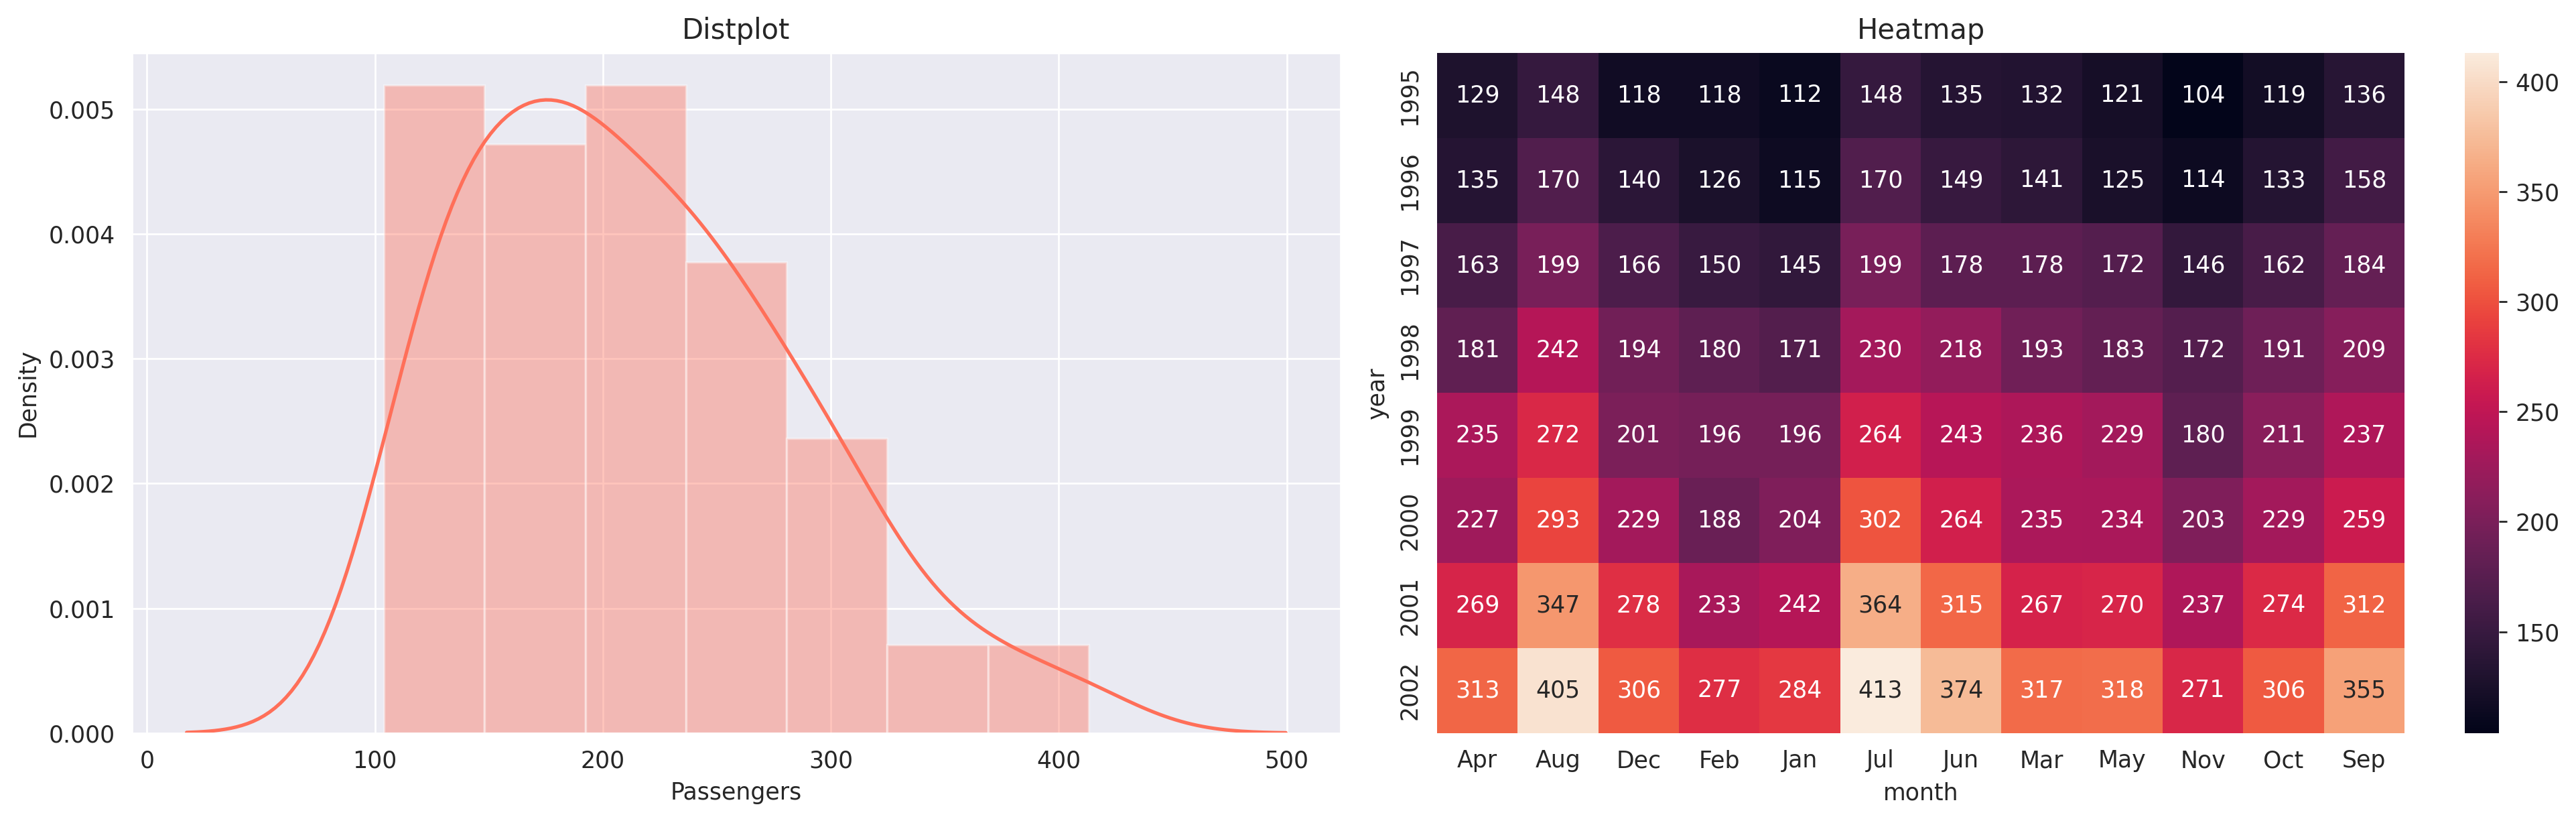

In [11]:
fig, ax = plt.subplots(ncols = 2, figsize=(16, 5))

ax[0].title.set_text('Distplot')
sns.distplot(al['Passengers'], color = '#ff6f59', ax=ax[0])

ax[1].title.set_text('Heatmap')
sns.heatmap(hm_y_m, annot = True, fmt="g", ax = ax[1])

plt.tight_layout()

### Preparing Lag-Plot

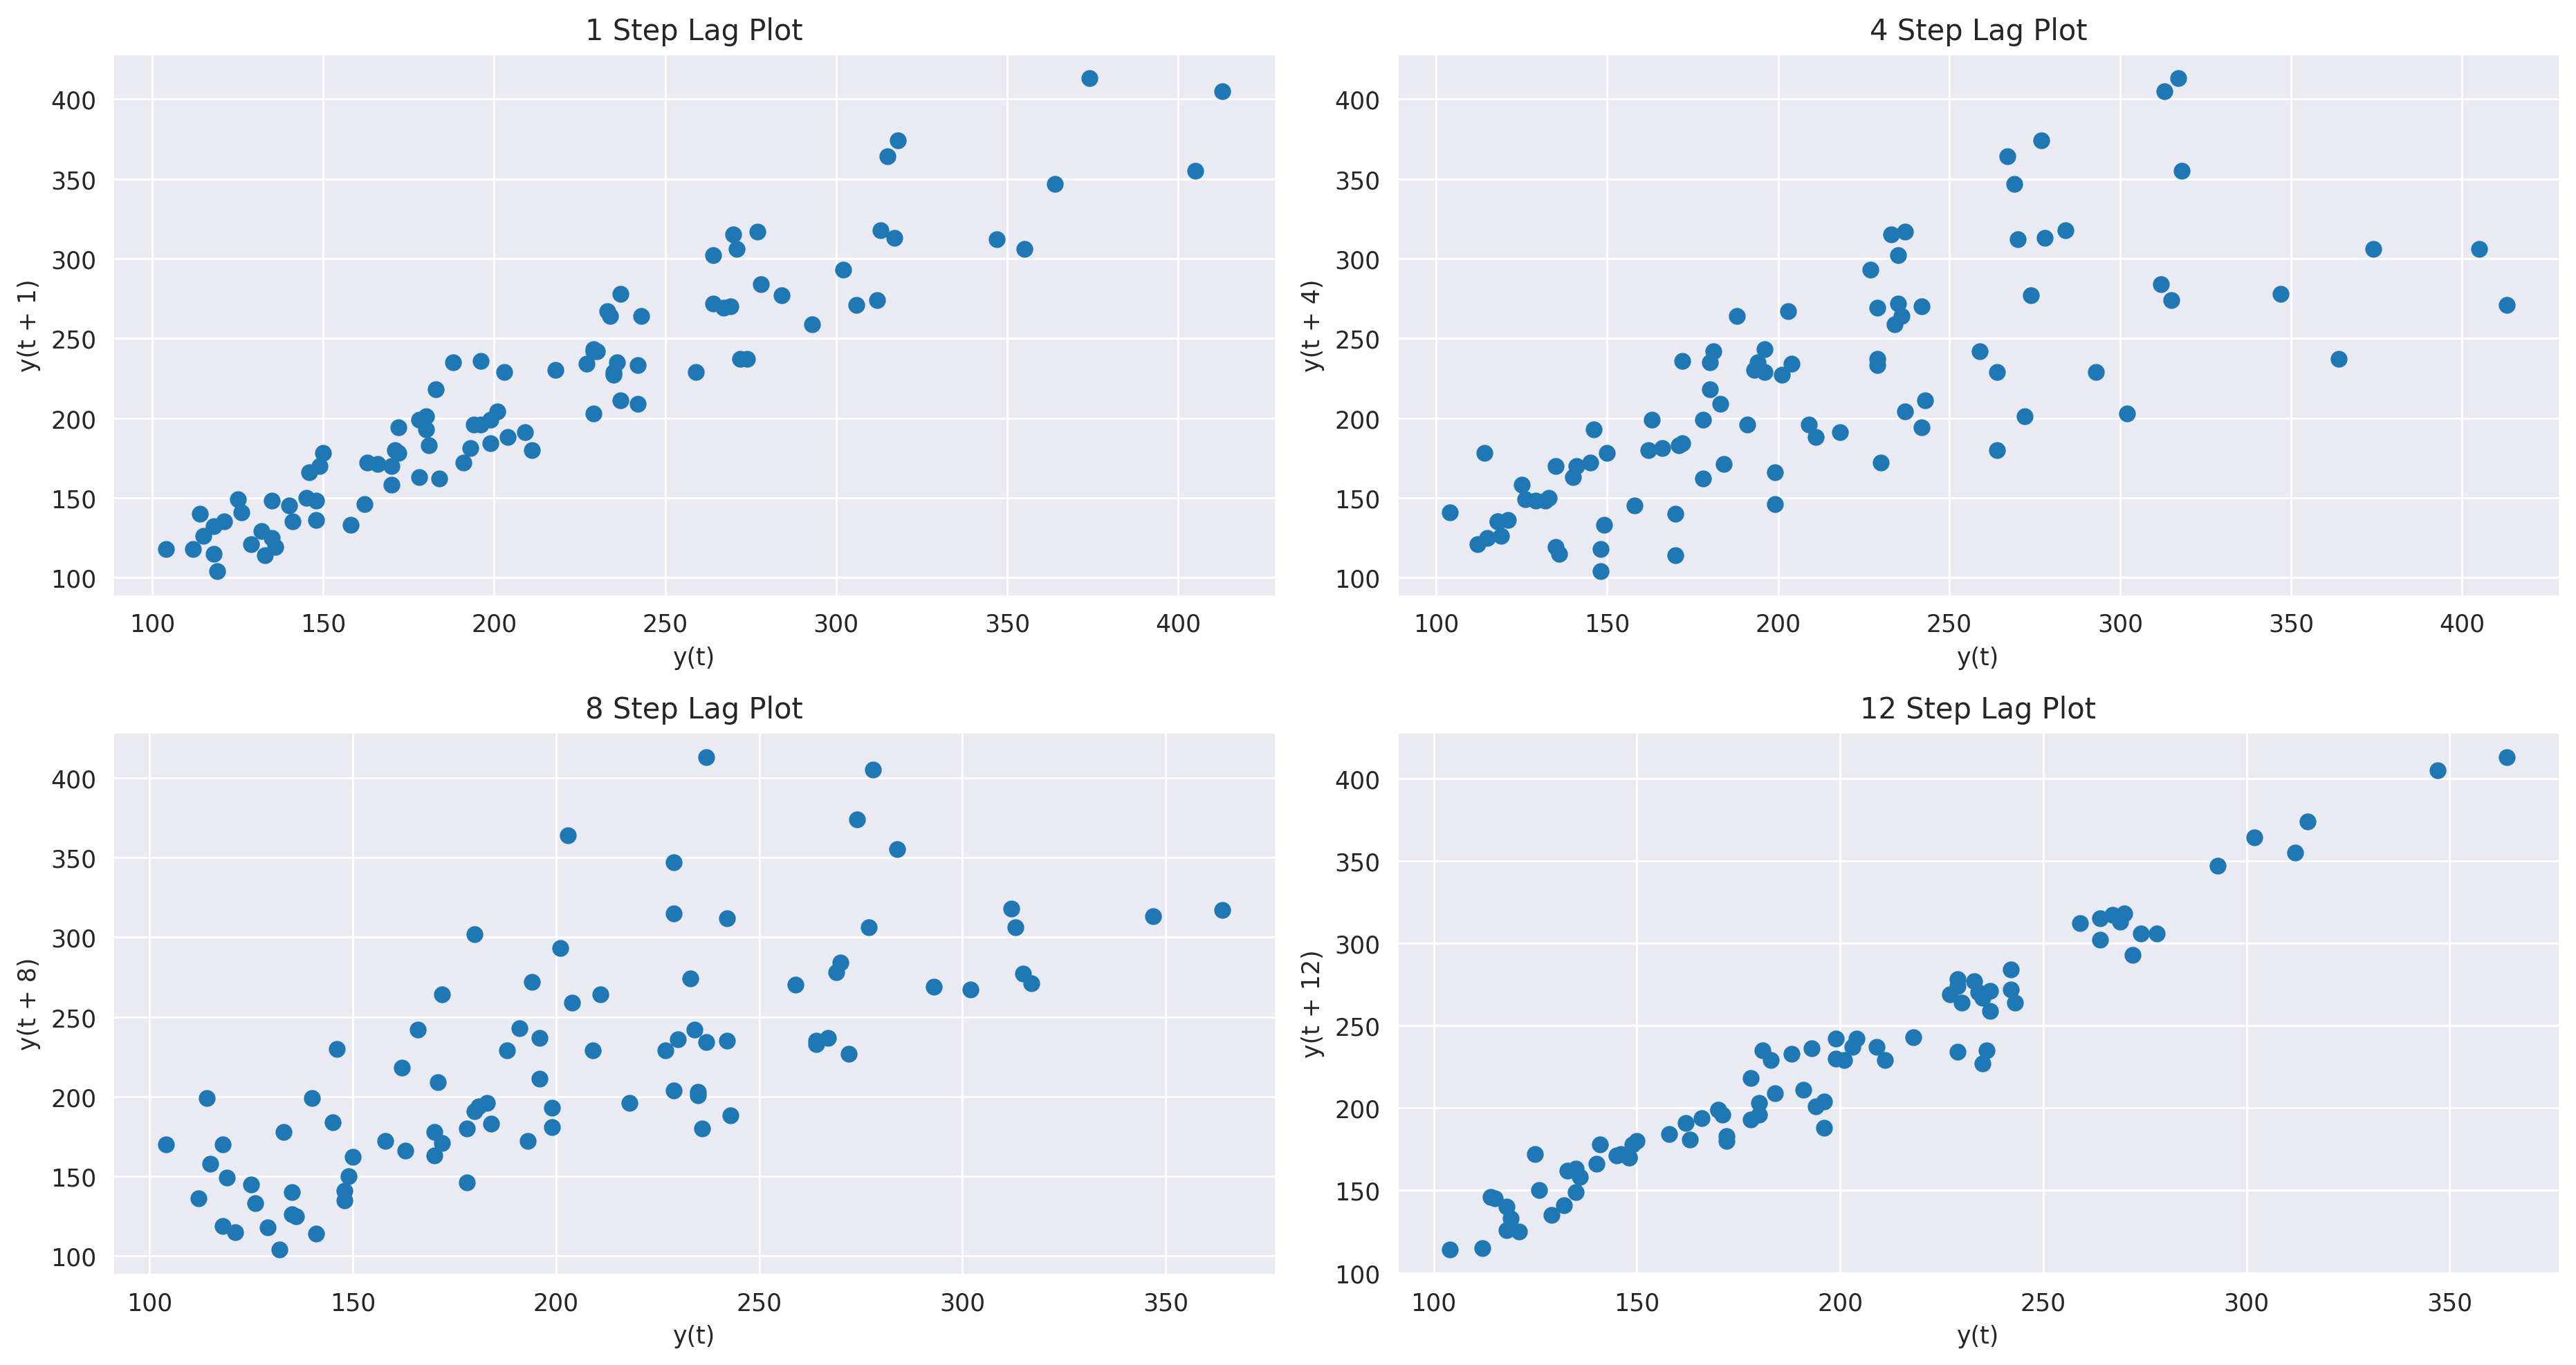

In [12]:
fig, ax = plt.subplots(2, 2, figsize = (15, 8))

plt.setp(ax[0, 0], title ='1 Step Lag Plot')
lag_plot(al.Passengers, lag=1, ax = ax[0, 0])

plt.setp(ax[0, 1], title ='4 Step Lag Plot')
lag_plot(al.Passengers, lag=4, ax = ax[0, 1])

plt.setp(ax[1, 0], title ='8 Step Lag Plot')
lag_plot(al.Passengers, lag=8, ax = ax[1, 0])

plt.setp(ax[1, 1], title ='12 Step Lag Plot')
lag_plot(al.Passengers, lag=12, ax = ax[1, 1])

plt.tight_layout()

### Converting Categorical Data To Numerical Data

#### Converting Independent Column Using Get Dummies

In [13]:
al = pd.get_dummies(al, columns = ['month'])

al.rename(columns = {   'month_Apr':'Apr',
                        'month_Aug':'Aug',
                        'month_Dec':'Dec',
                        'month_Feb':'Feb',
                        'month_Jan':'Jan',
                        'month_Jul':'Jul',
                        'month_Jun':'Jun',
                        'month_Mar':'Mar',
                        'month_May':'May',
                        'month_Nov':'Nov',
                        'month_Oct':'Oct',
                        'month_Sep':'Sep'}, inplace = True)

al.head()

Date  Passengers  year  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  \
0 1995-01-01         112  1995    0    0    0    0    1    0    0    0    0   
1 1995-02-01         118  1995    0    0    0    1    0    0    0    0    0   
2 1995-03-01         132  1995    0    0    0    0    0    0    0    1    0   
3 1995-04-01         129  1995    1    0    0    0    0    0    0    0    0   
4 1995-05-01         121  1995    0    0    0    0    0    0    0    0    1   

   Nov  Oct  Sep  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

### Performing Squared and Log Transformation

In [14]:
al['t'] = np.arange(1,97)
al['squared_t'] = al['t']*al['t']

al['log_Passengers'] = np.log(al['Passengers'])
al['sqrt_Passengers'] = np.sqrt(al['Passengers'])

al.head()

Date  Passengers  year  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  \
0 1995-01-01         112  1995    0    0    0    0    1    0    0    0    0   
1 1995-02-01         118  1995    0    0    0    1    0    0    0    0    0   
2 1995-03-01         132  1995    0    0    0    0    0    0    0    1    0   
3 1995-04-01         129  1995    1    0    0    0    0    0    0    0    0   
4 1995-05-01         121  1995    0    0    0    0    0    0    0    0    1   

   Nov  Oct  Sep  t  squared_t  log_Passengers  sqrt_Passengers  
0    0    0    0  1          1        4.718499        10.583005  
1    0    0    0  2          4        4.770685        10.862780  
2    0    0    0  3          9        4.882802        11.489125  
3    0    0    0  4         16        4.859812        11.357817  
4    0    0    0  5         25        4.795791        11.000000

#### Comparing Original, Log And Sqrt Data With Line-Plot

<Axes: title={'center': 'Sqrt Data'}, ylabel='sqrt_Passengers'>

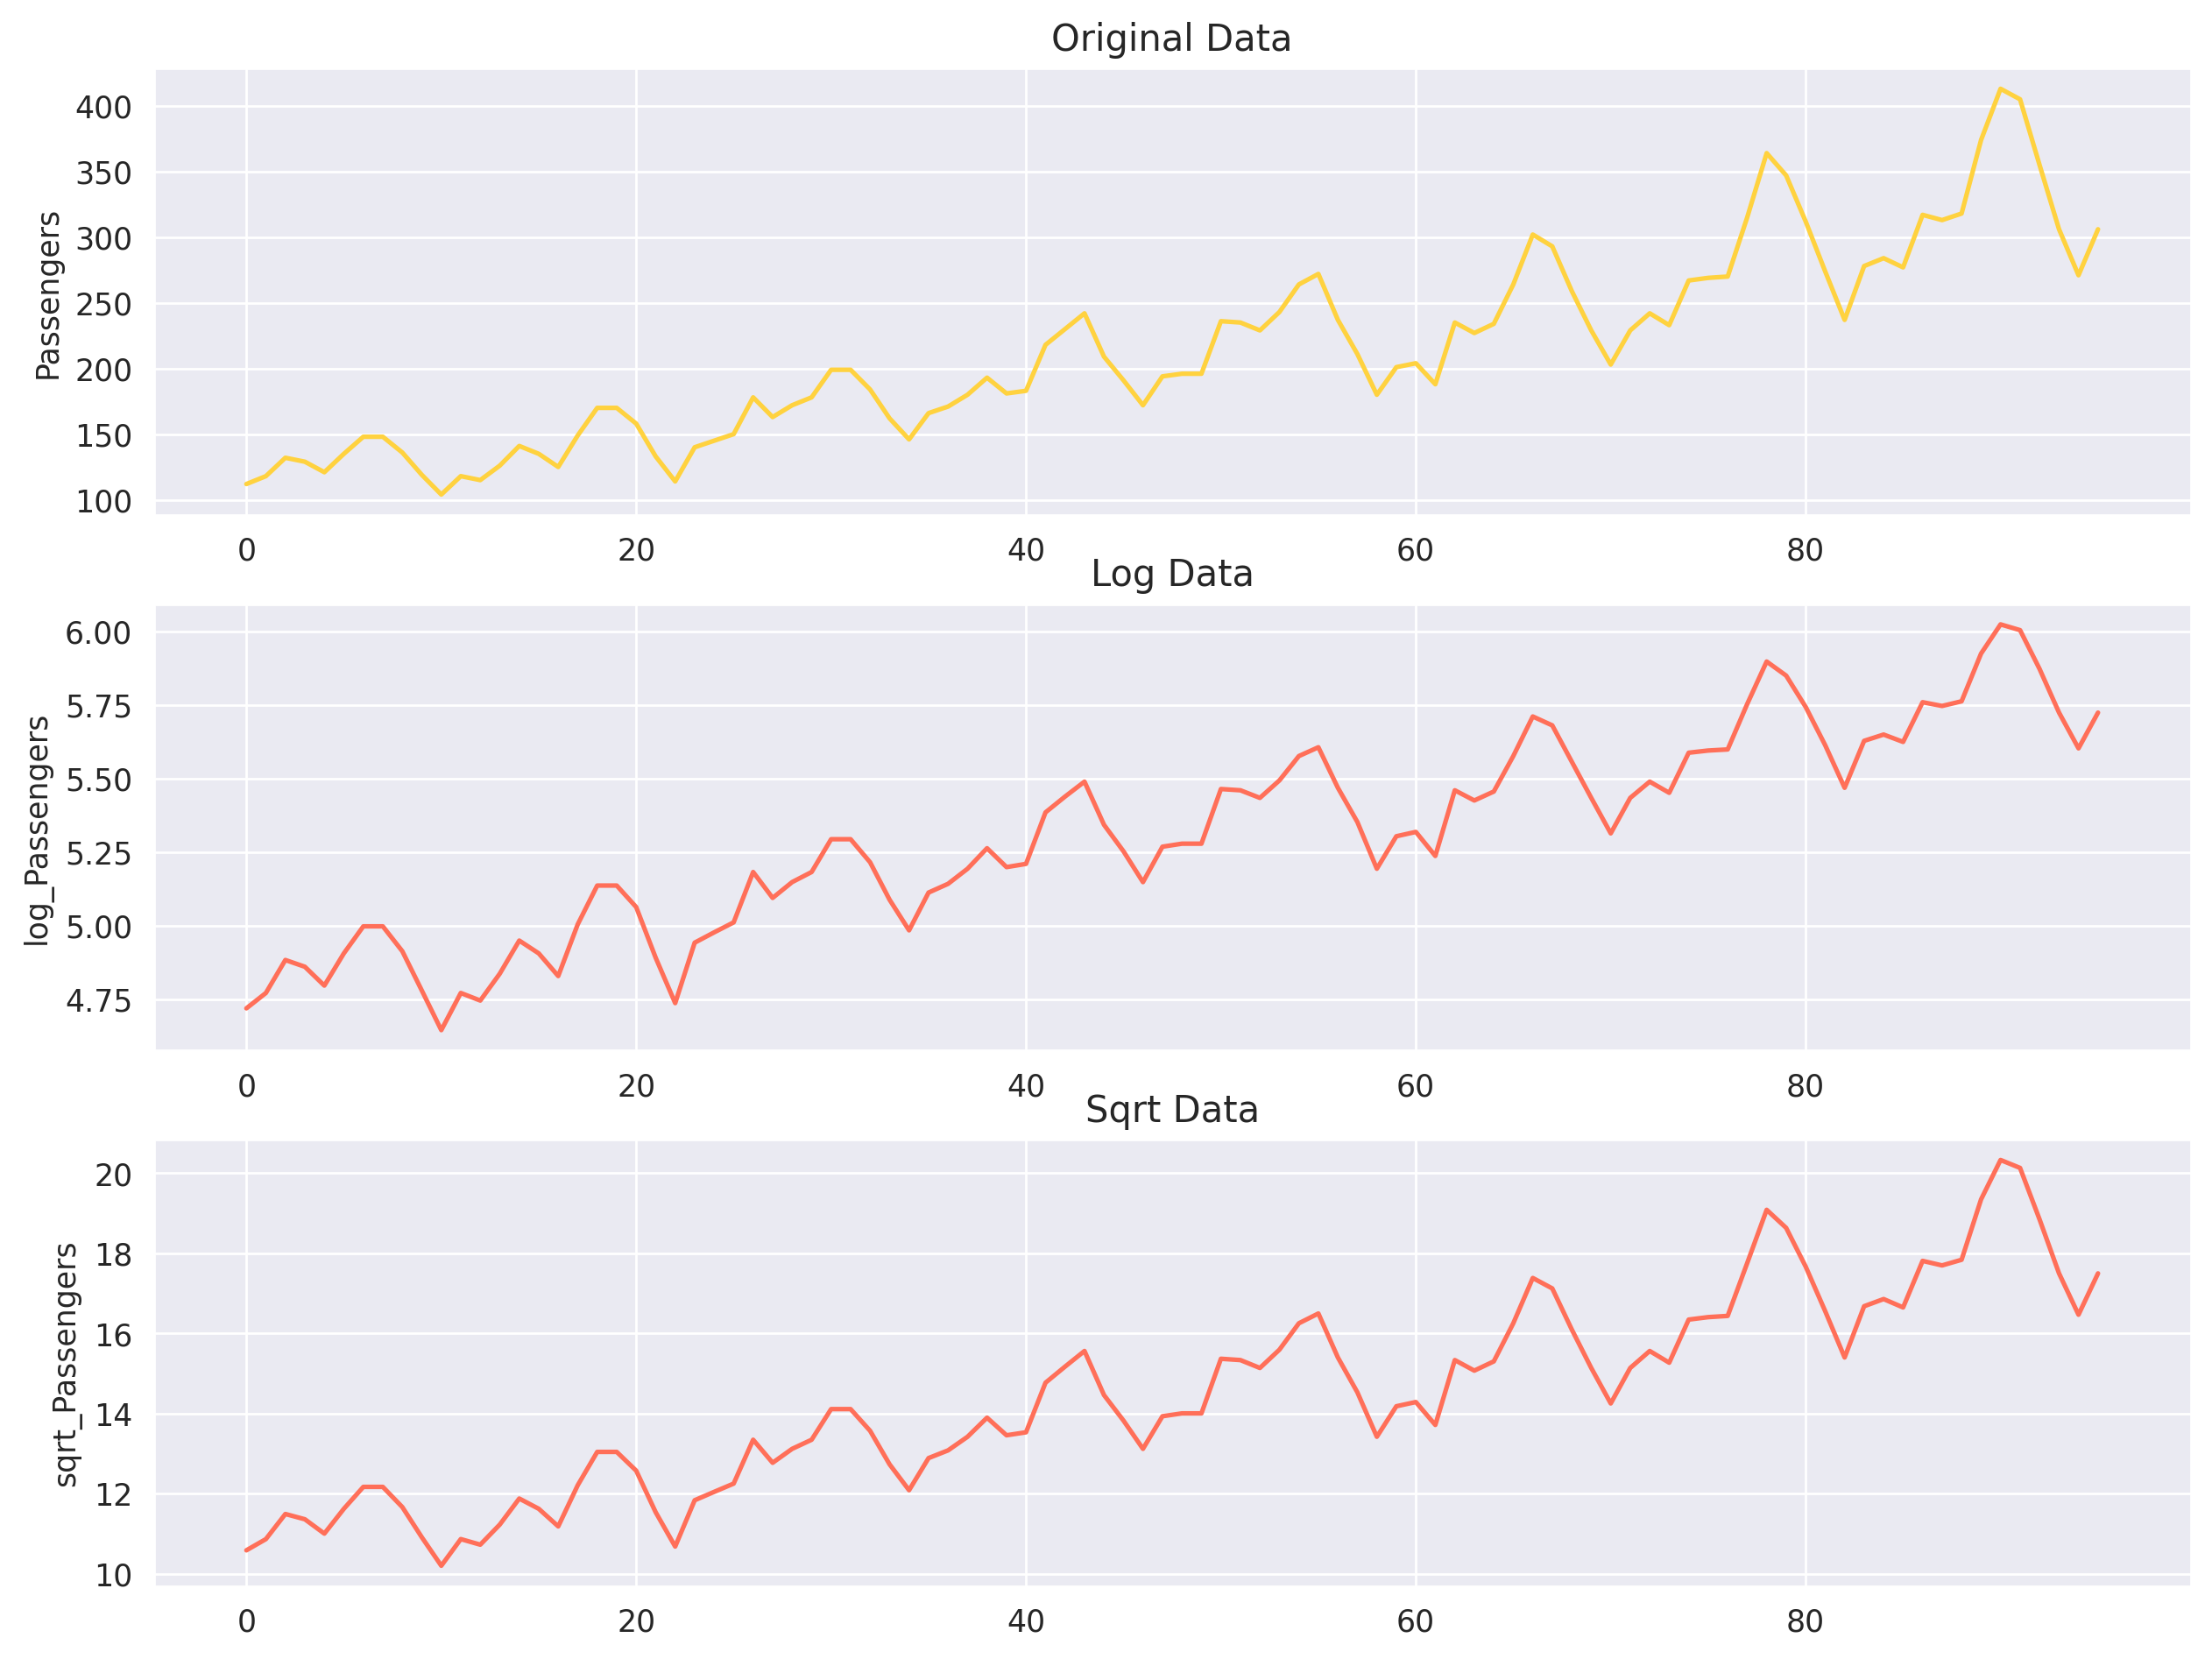

In [15]:
fig, ax = plt.subplots(nrows = 3, figsize=(12, 9))

plt.setp(ax[0], title = 'Original Data')
sns.lineplot(al['Passengers'], color = '#ffd23f', ax = ax[0])

plt.setp(ax[1], title = 'Log Data')
sns.lineplot(al['log_Passengers'], color = '#ff6f59', ax = ax[1])

plt.setp(ax[2], title = 'Sqrt Data')
sns.lineplot(al['sqrt_Passengers'], color = '#ff6f59', ax = ax[2])

#### Comparing Original, Log And Sqrt Data With Dist-Plot

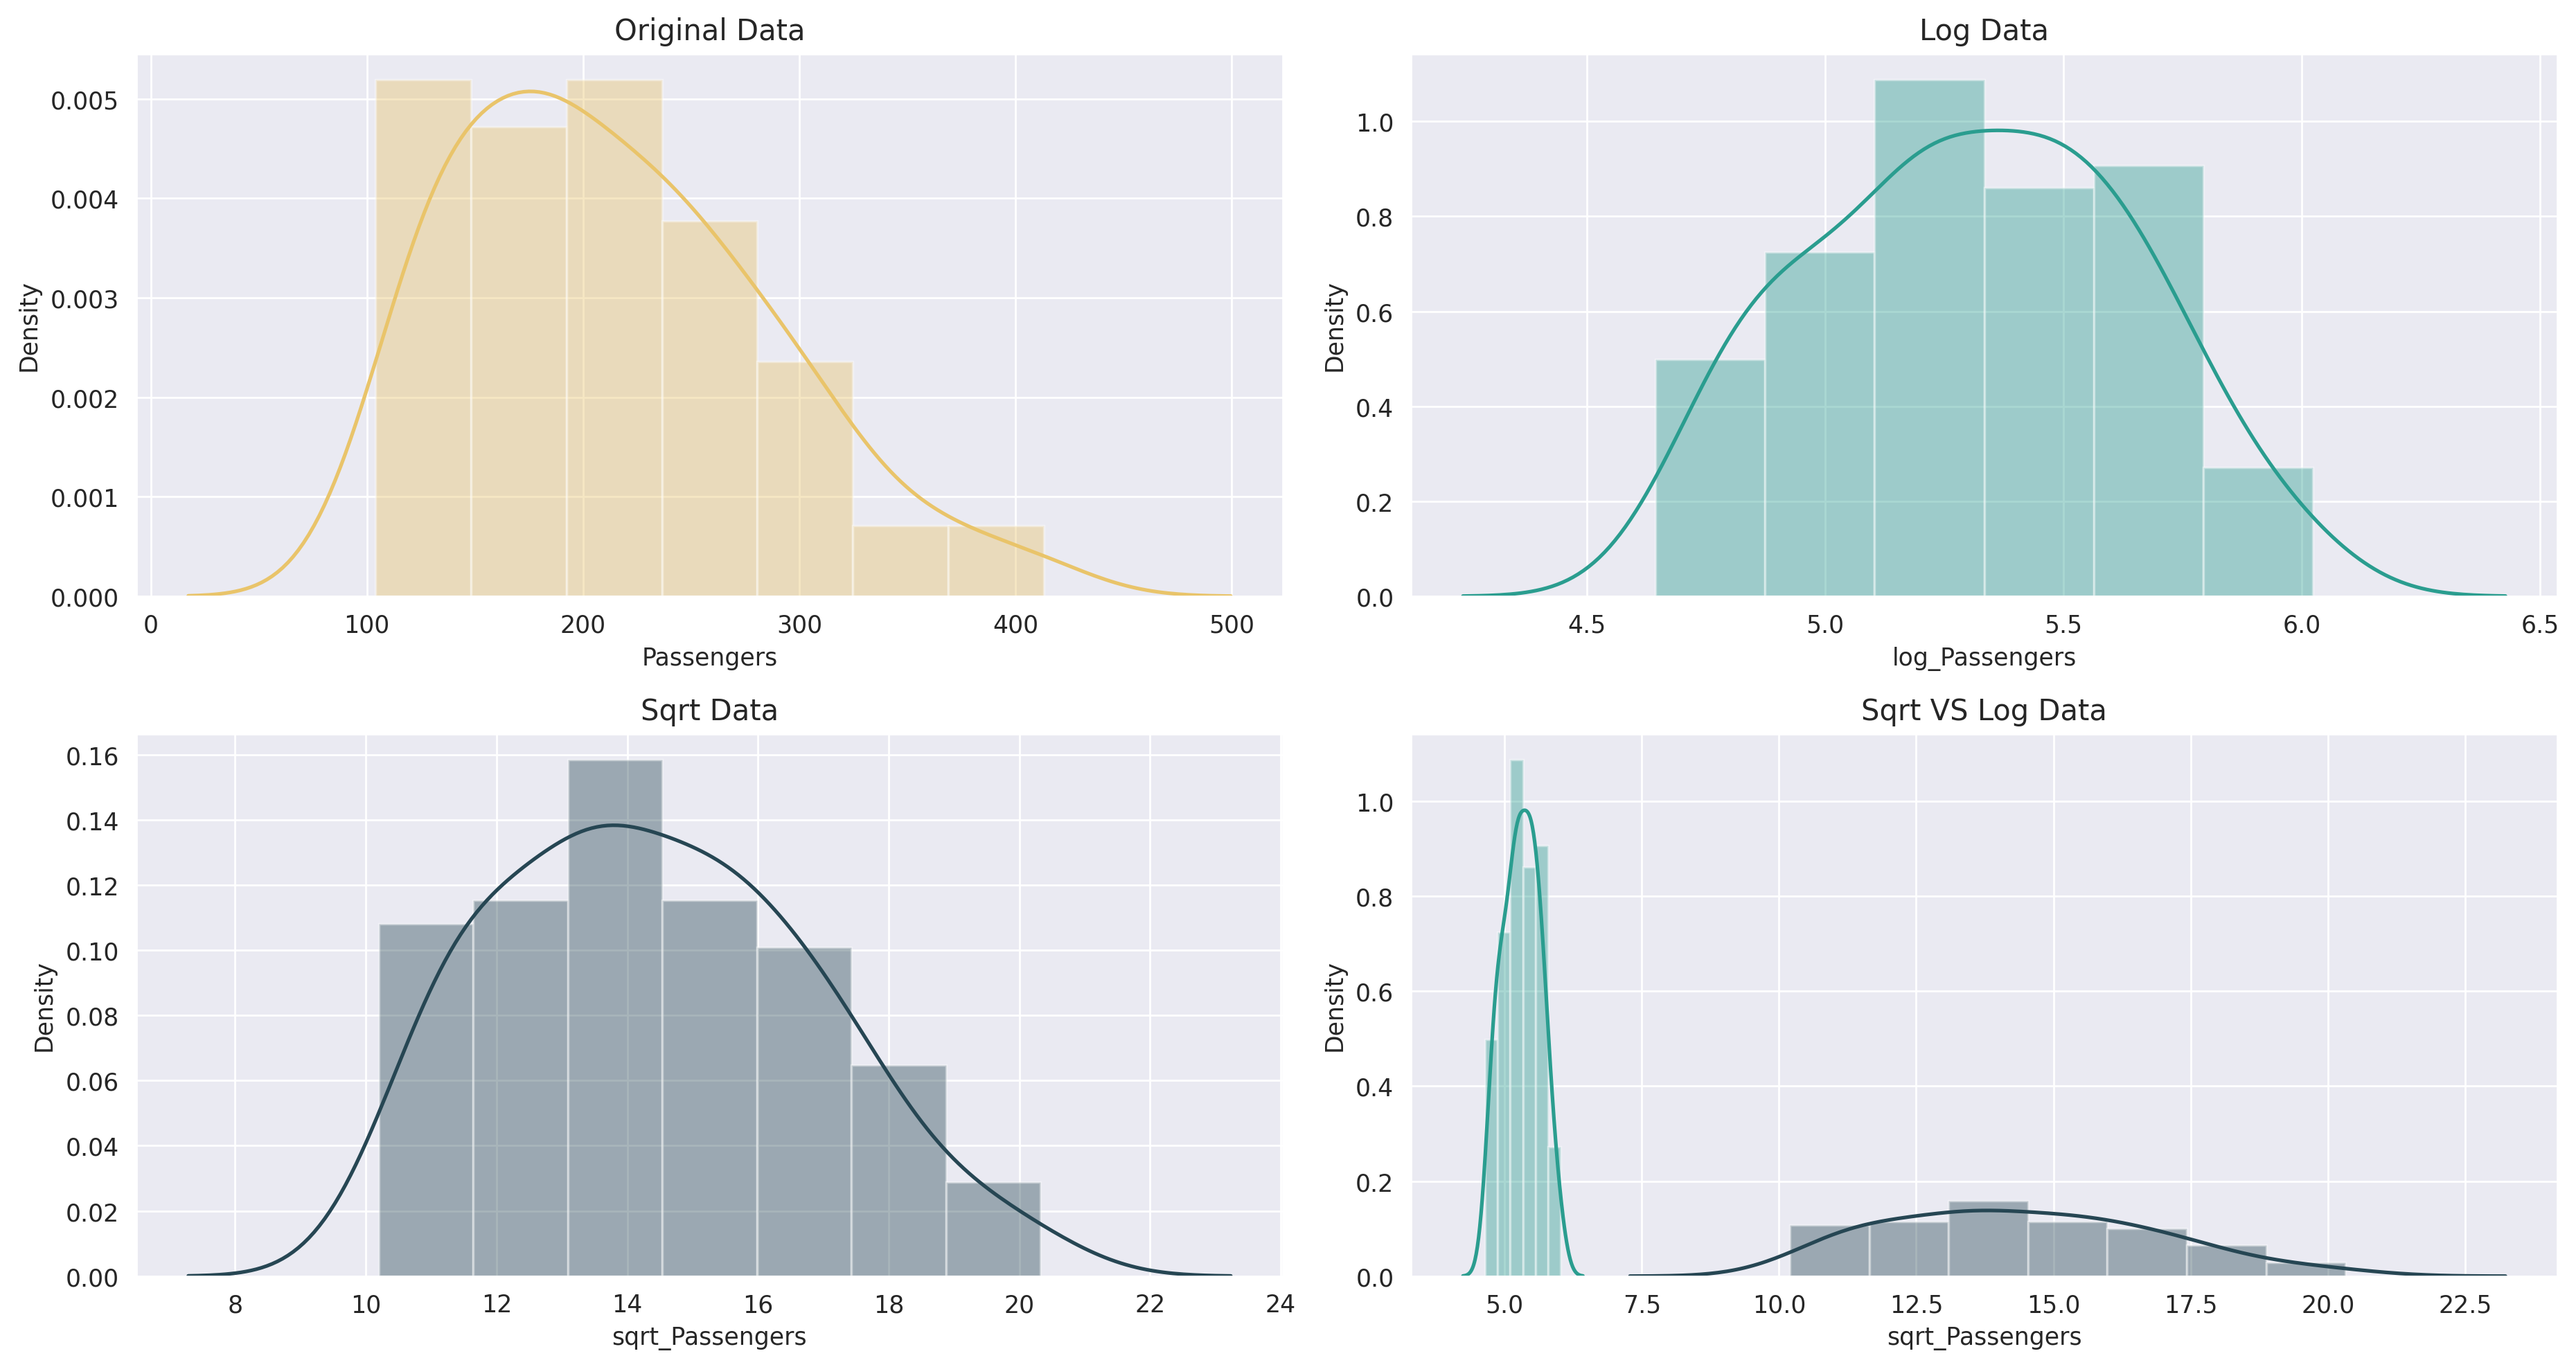

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

plt.setp(ax[0, 0], title = 'Original Data')
sns.distplot(al['Passengers'], color = '#e9c46a', ax = ax[0, 0])

plt.setp(ax[0, 1], title = 'Log Data')
sns.distplot(al['log_Passengers'], color = '#2a9d8f', ax = ax[0, 1])

plt.setp(ax[1, 0], title = 'Sqrt Data')
sns.distplot(al['sqrt_Passengers'], color = '#264653', ax = ax[1, 0])

plt.setp(ax[1, 1], title = 'Sqrt VS Log Data')
sns.distplot(al['log_Passengers'], color = '#2a9d8f', ax = ax[1, 1])
sns.distplot(al['sqrt_Passengers'], color = '#264653', ax = ax[1, 1])


plt.tight_layout()

## Preparing Moving Average

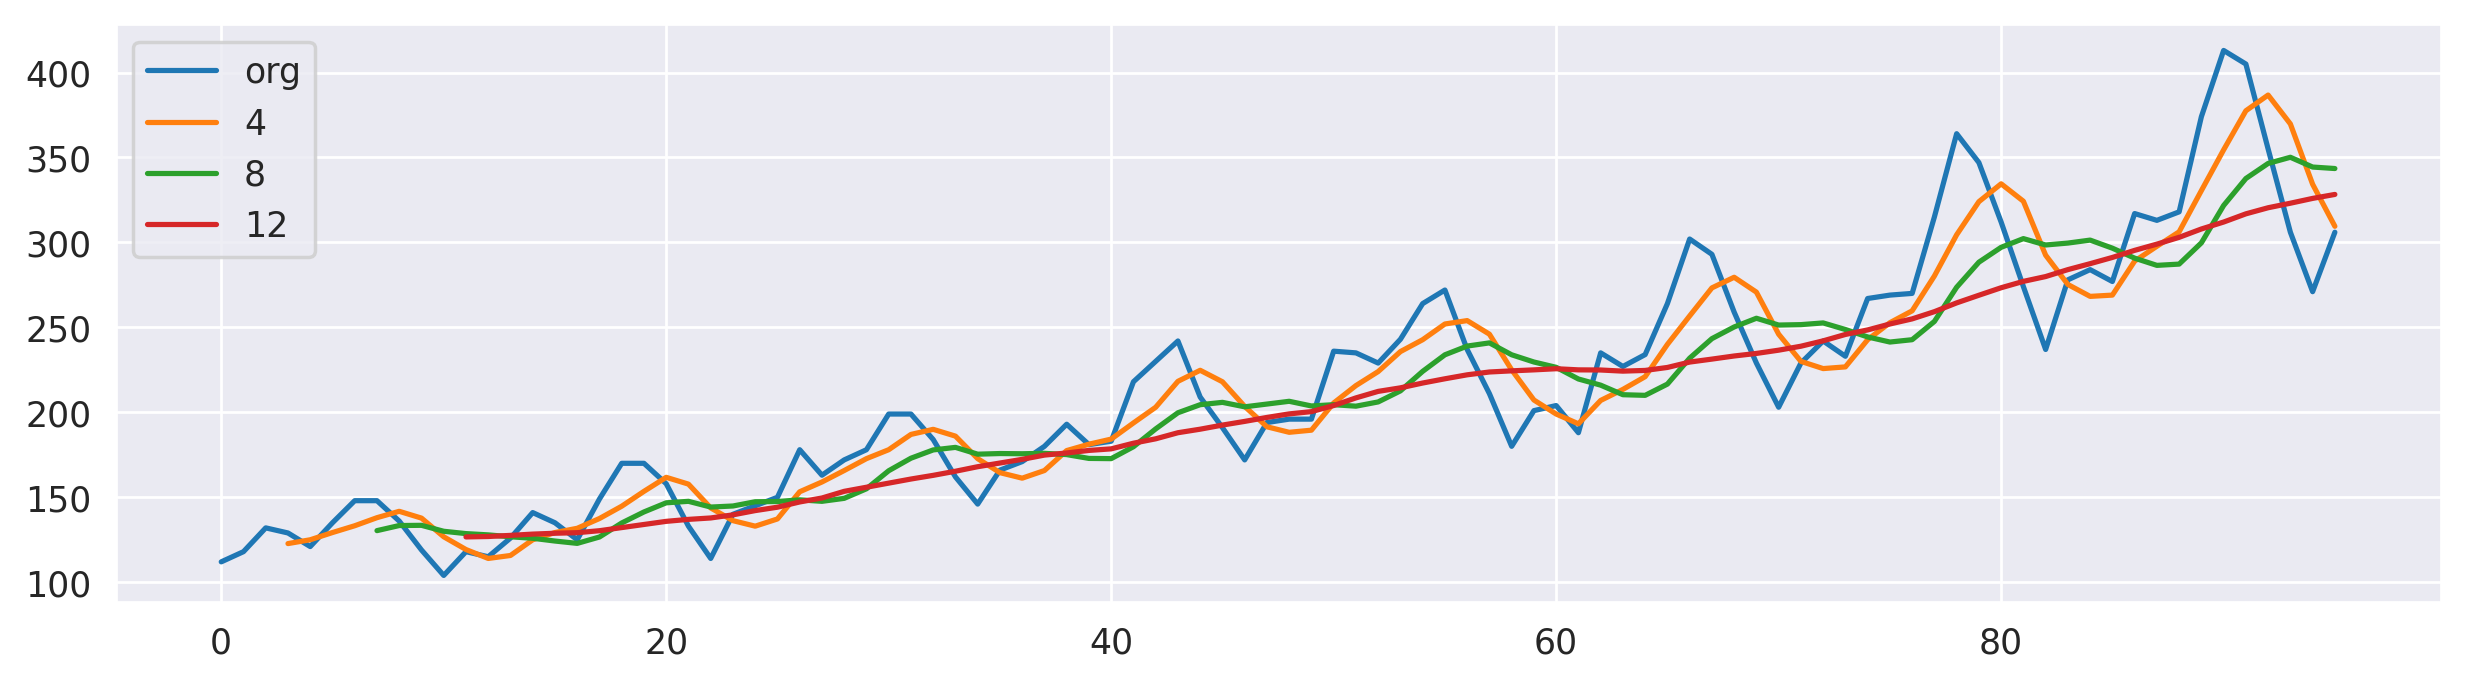

In [17]:
al.Passengers.plot(label="org")
for i in range(4,13,4):
    al["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

## Performing First-Order Difference

In [18]:
fo = al[['Date', 'Passengers']]
fo.set_index('Date', inplace = True)

fo['First-Order'] = fo['Passengers'].diff(periods = 1)

fo.dropna(inplace=True)

fo.head()

Passengers  First-Order
Date                               
1995-02-01         118          6.0
1995-03-01         132         14.0
1995-04-01         129         -3.0
1995-05-01         121         -8.0
1995-06-01         135         14.0

#### Ploting Original Data VS First Order Graph

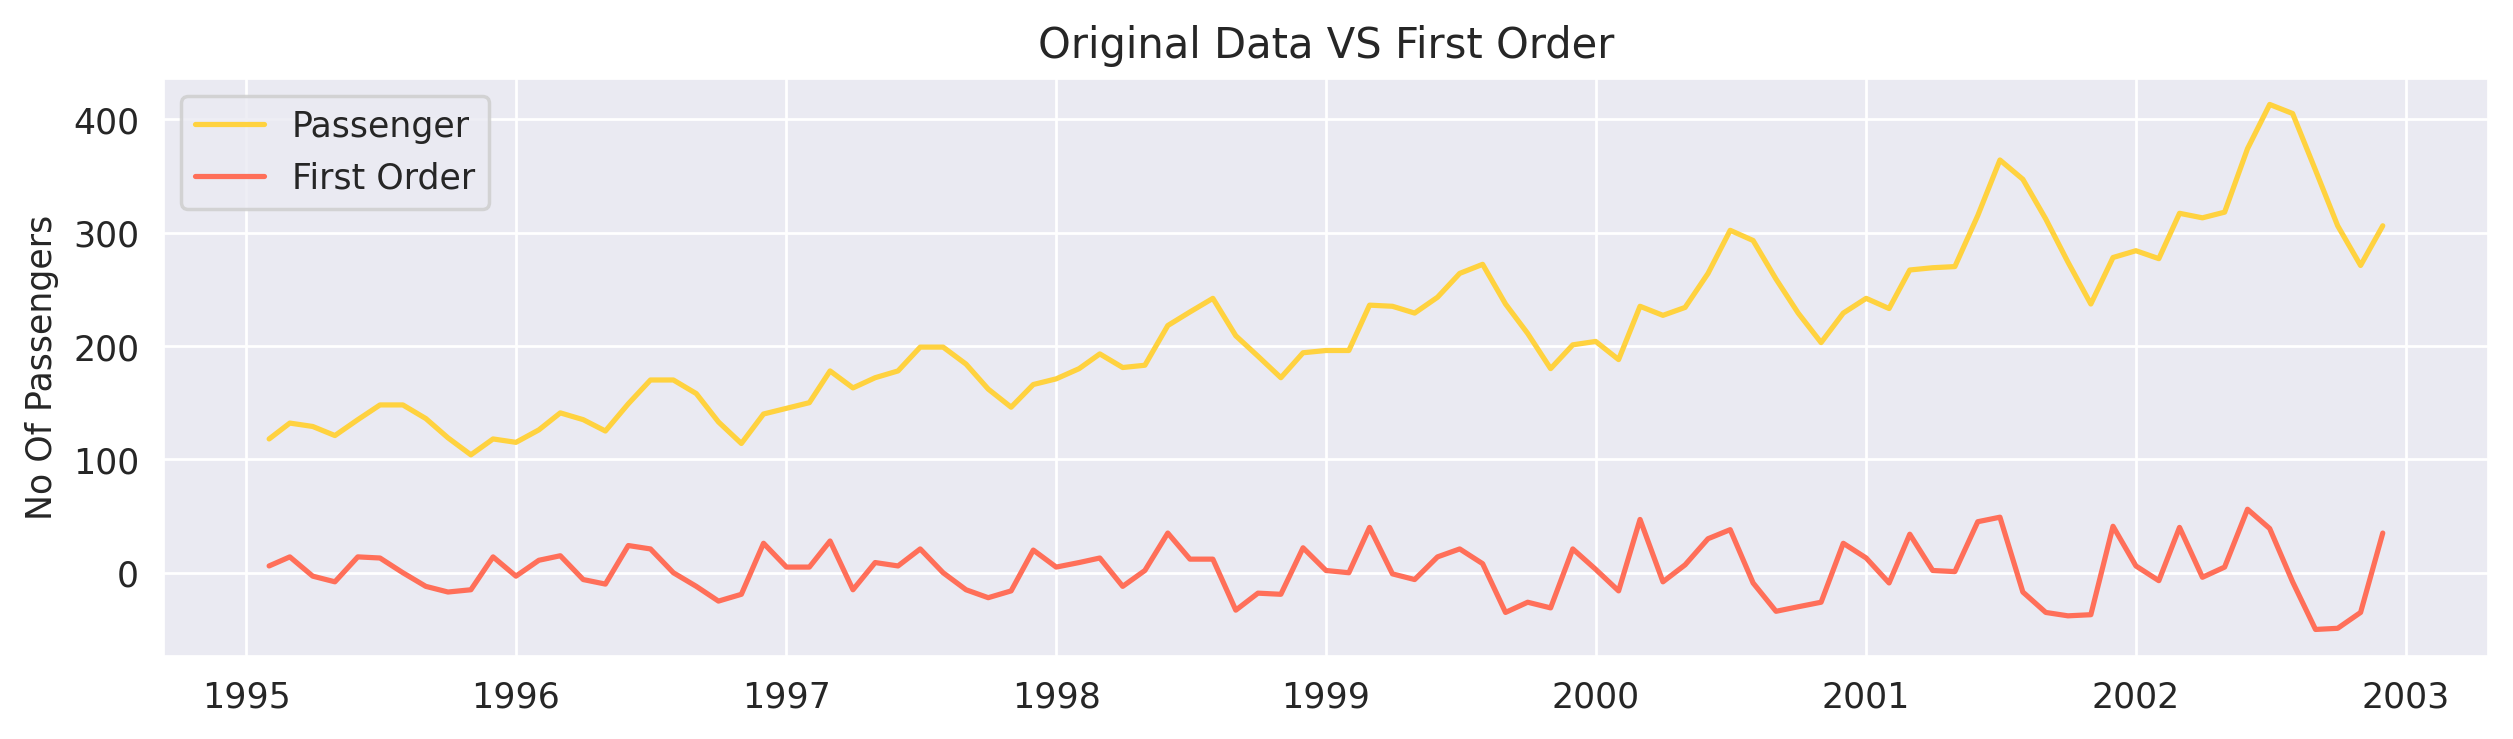

In [19]:
plt.title('Original Data VS First Order')
plt.ylabel('No Of Passengers')
plt.plot(fo['Passengers'], color = '#ffd23f', label = 'Passenger')
plt.plot(fo['First-Order'], color = '#ff6f59', label = 'First Order')
plt.legend()

#### Ploting Autocorrelation And Partial Autocorrelation Graph

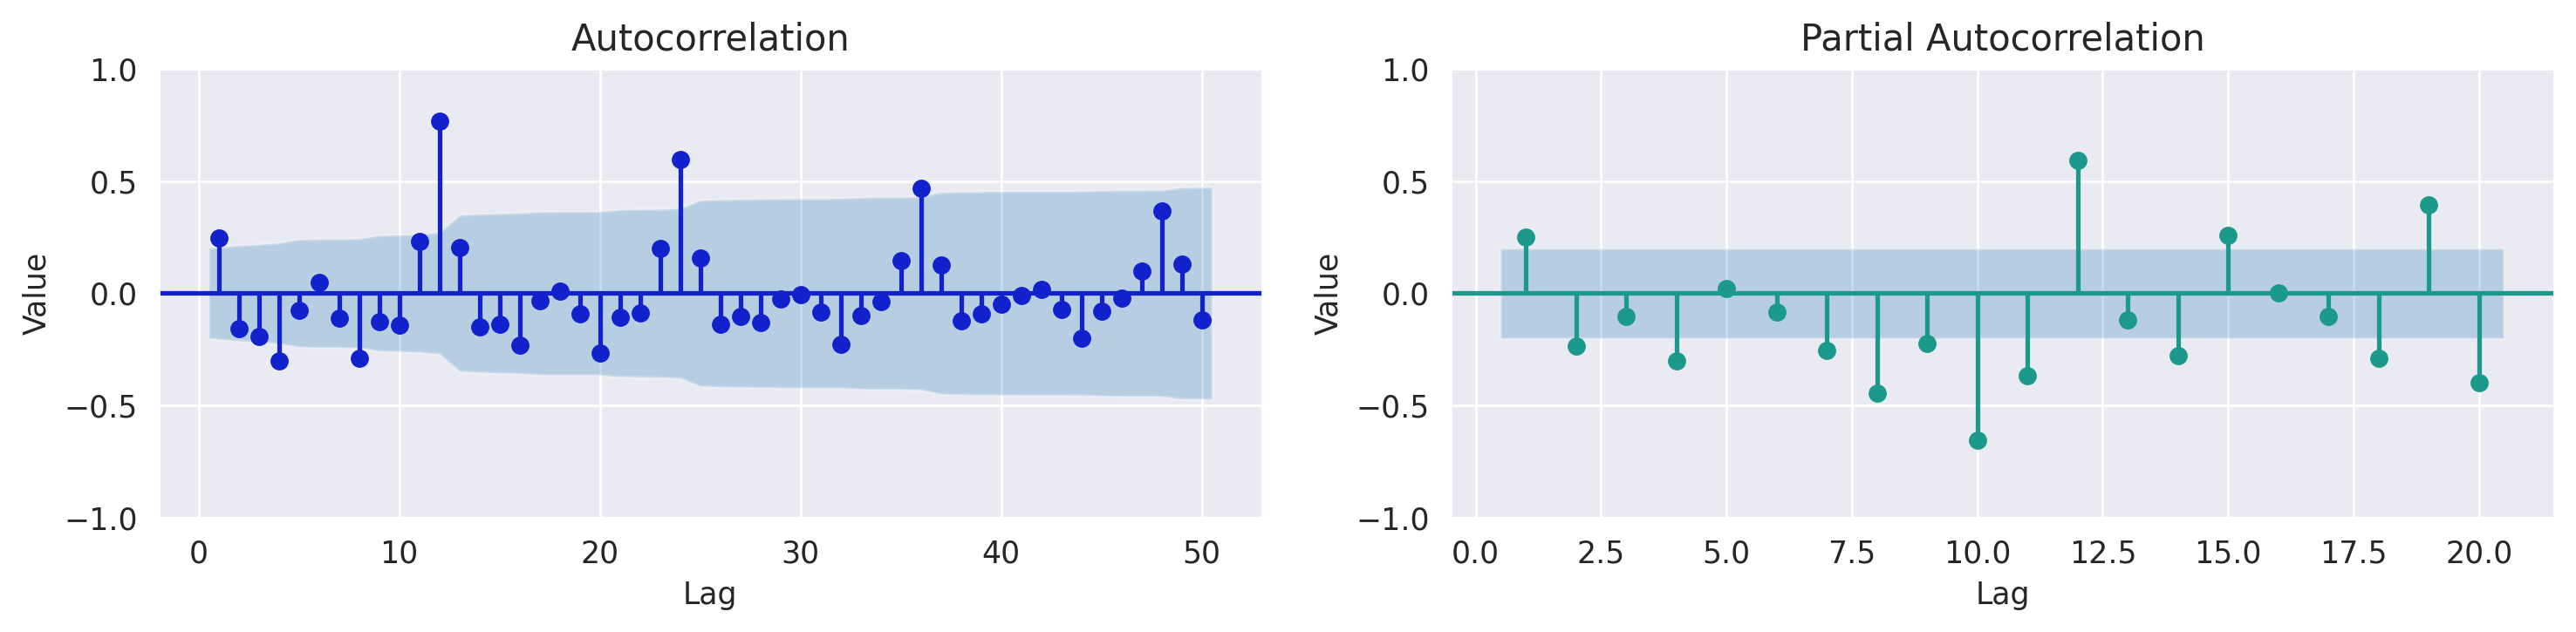

In [20]:
fig, ax = plt.subplots(ncols = 2)

plt.setp(ax[0], xlabel='Lag')
plt.setp(ax[0], ylabel='Value')
plot_acf(fo['First-Order'], lags=50, ax = ax[0], color='#1122cc', vlines_kwargs={"colors": '#1122cc'}, zero = False);

plt.setp(ax[1], xlabel='Lag')
plt.setp(ax[1], ylabel='Value')
plot_pacf(fo['First-Order'], ax = ax[1], color='#1b998b', vlines_kwargs={"colors": '#1b998b'}, zero = False);

plt.tight_layout()

## Splitting Data Into Training And Test

In [21]:
train = al.head(72)
test = al.tail(24)

### Ploting Training And Testing Data

<Axes: title={'center': 'Training VS Testing'}, xlabel='Date', ylabel='Passengers'>

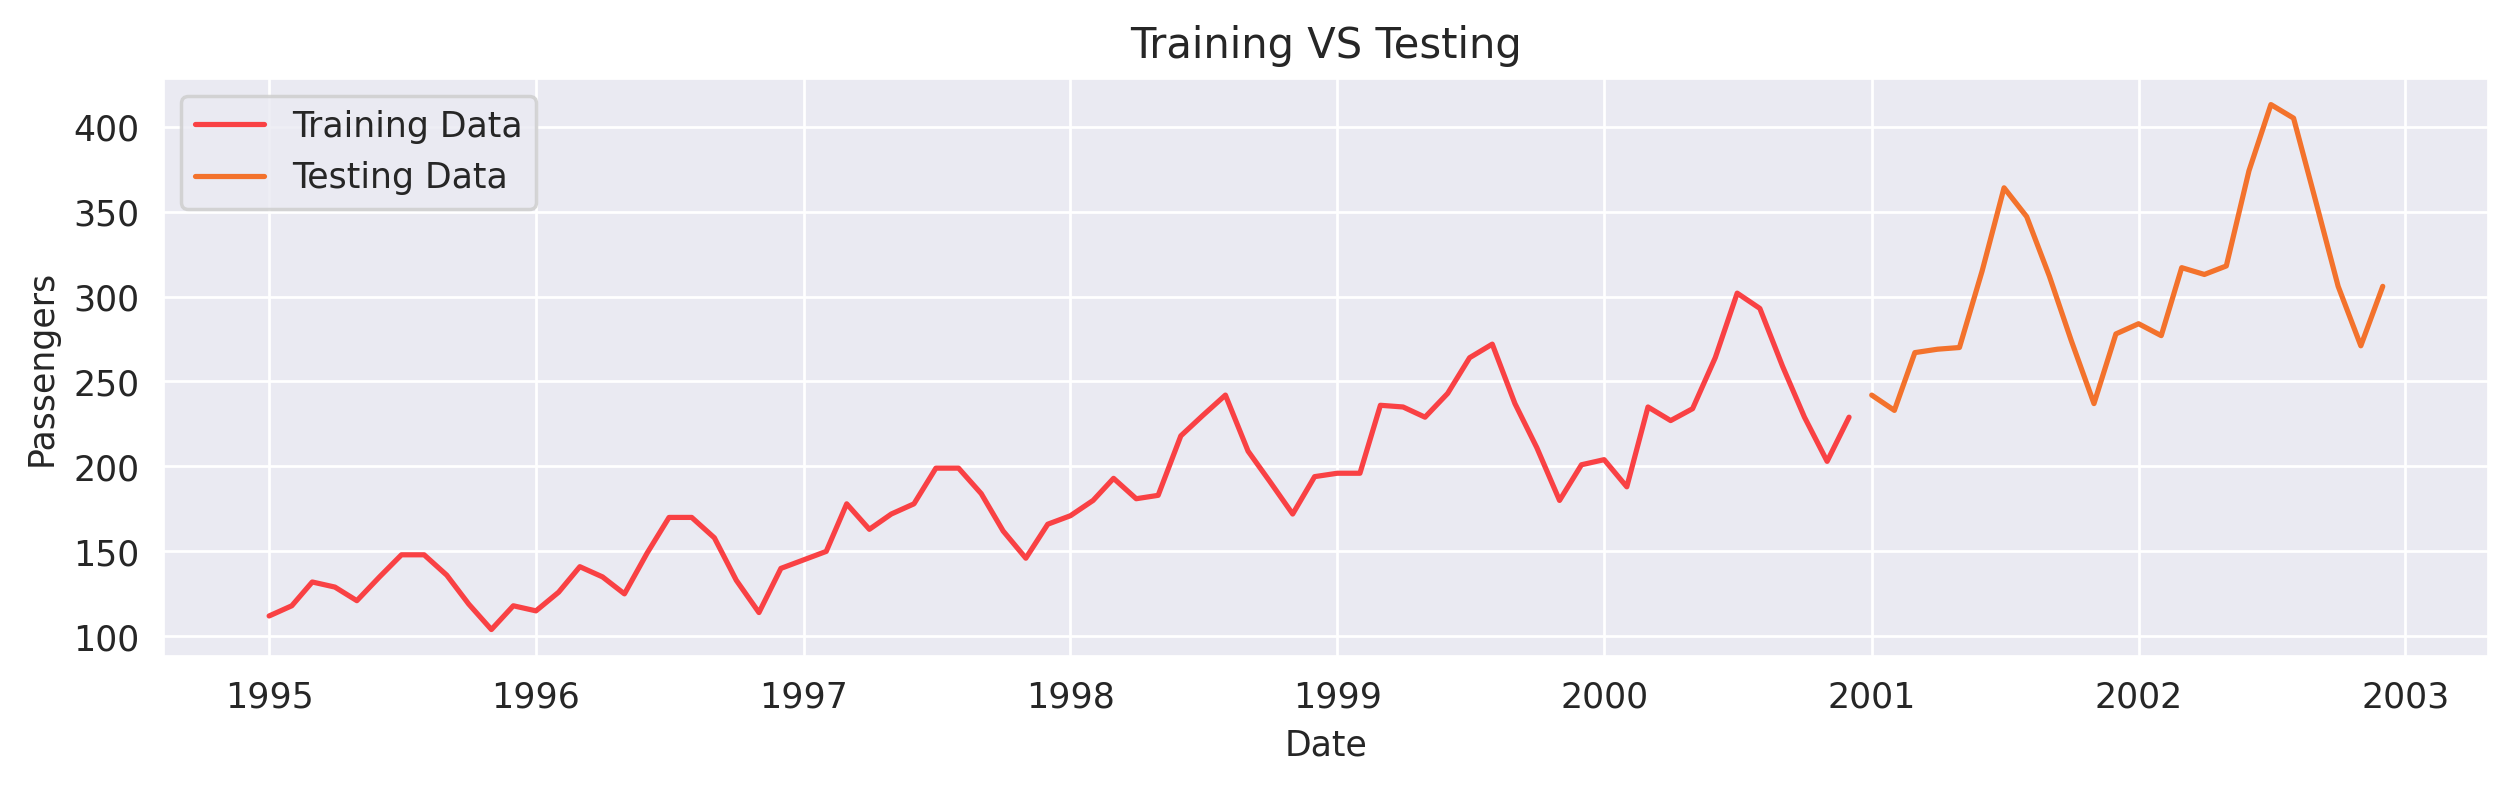

In [22]:
plt.title('Training VS Testing')
sns.lineplot(x=train['Date'], y = train['Passengers'], color = '#f94144', label = 'Training Data')
sns.lineplot(x=test['Date'], y = test['Passengers'], color = '#f3722c', label = 'Testing Data')

## Preparing Model From The Dataset

### Creating Linear Model

In [23]:
linear_model = smf.ols('Passengers~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(mean_squared_error(test['Passengers'], pred_linear))

#### Evaluating The Model

Text(0.5, 0, 'Linear Model RMSE Value : 51.667792995646266')

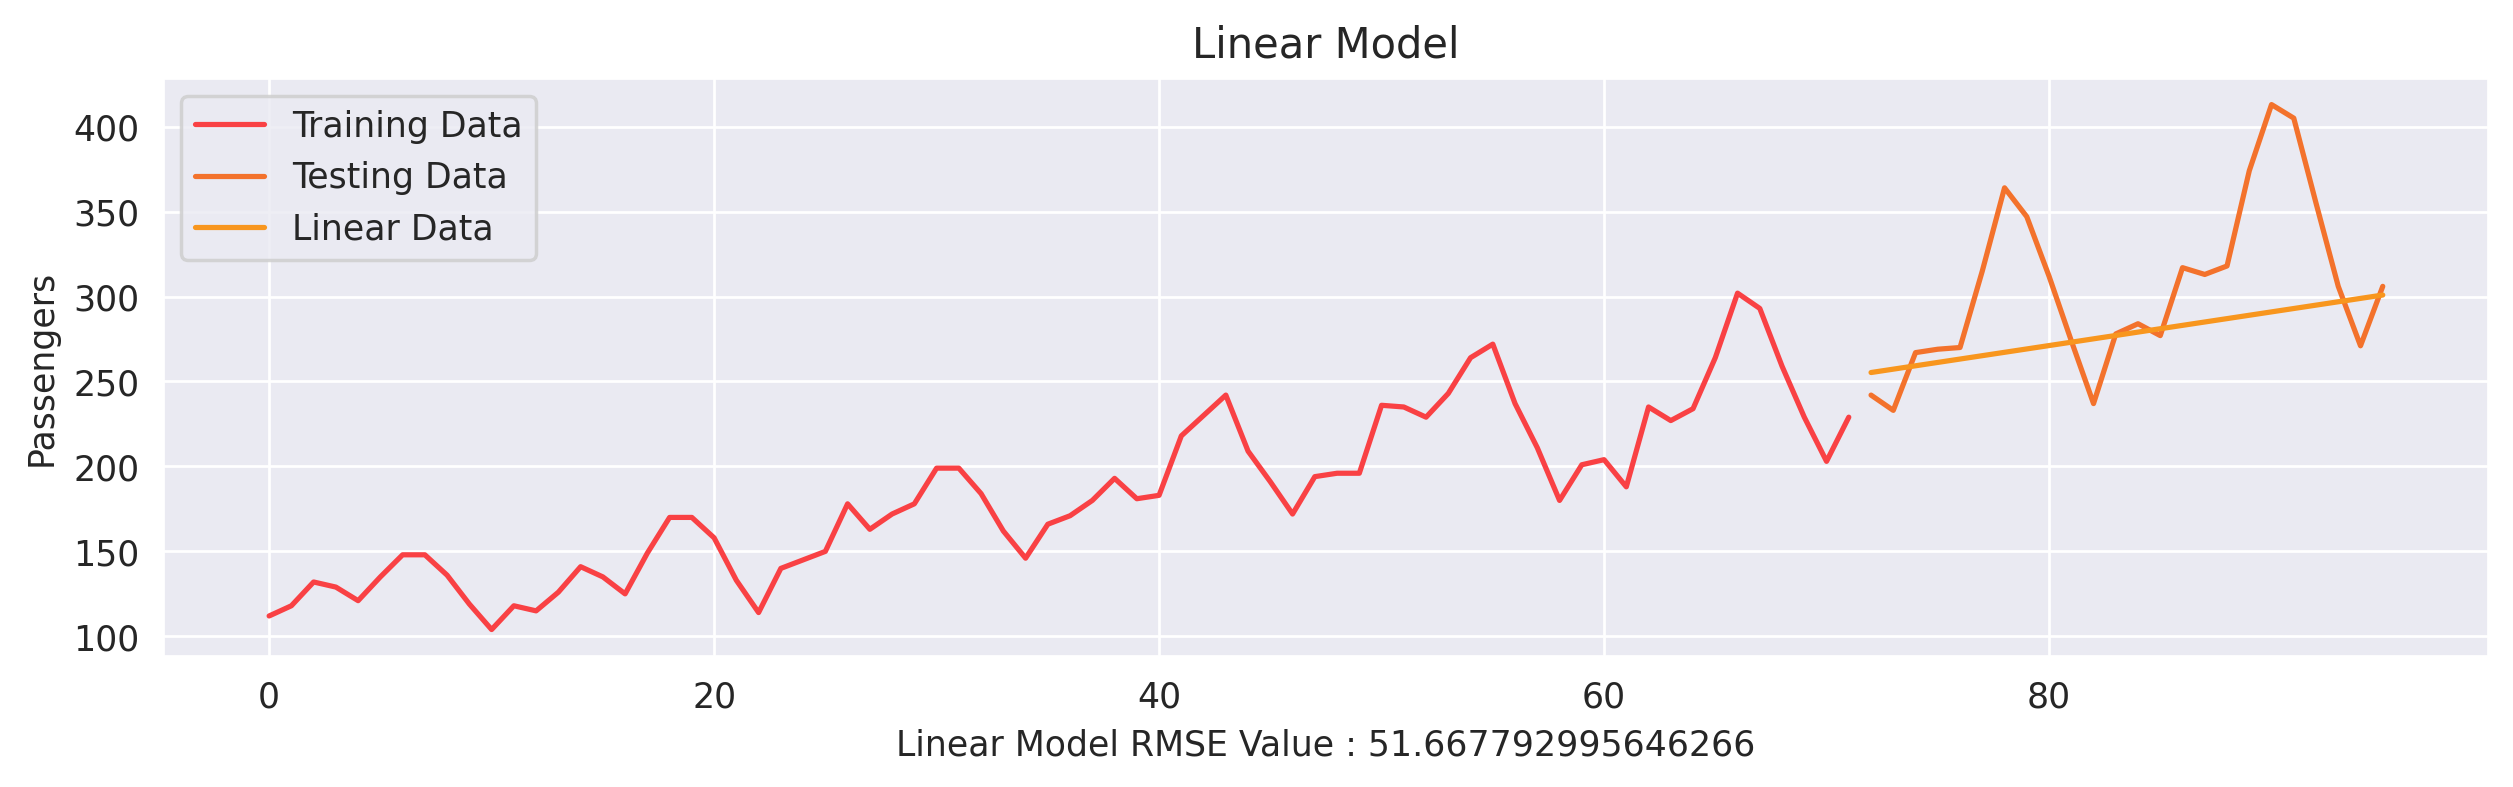

In [24]:
plt.title('Linear Model')
sns.lineplot(train['Passengers'], color = '#f94144', label = 'Training Data')
sns.lineplot(test['Passengers'], color = '#f3722c', label = 'Testing Data')
sns.lineplot(pred_linear, color = '#f8961e', label = 'Linear Data')
plt.xlabel('Linear Model RMSE Value : ' + str(rmse_linear))

### Creating Exponential Model

In [25]:
exp_model = smf.ols('log_Passengers~t',data=train).fit()
pred_exp =  pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(mean_squared_error(test['Passengers'], pred_linear))

#### Evaluating The Model

Text(0.5, 0, 'Exponential Model RMSE Value : 51.667792995646266')

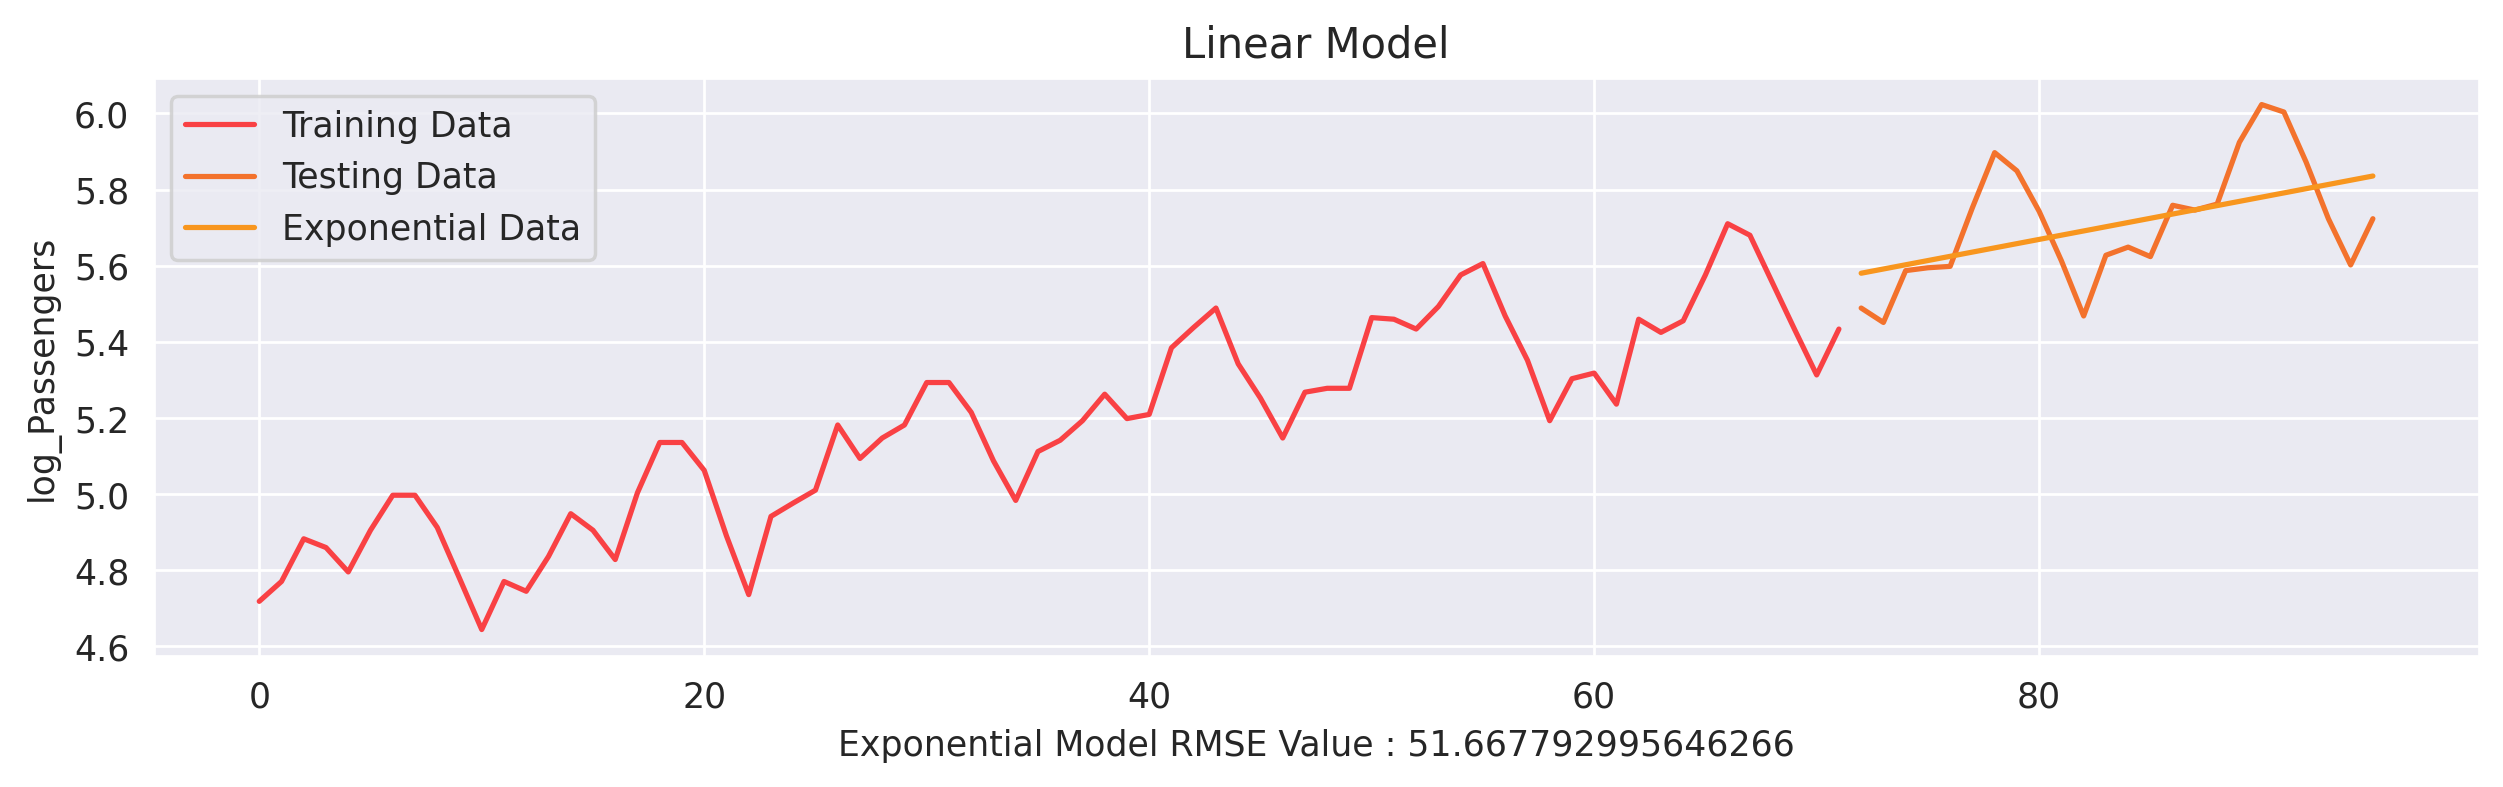

In [26]:
plt.title('Linear Model')
sns.lineplot(train['log_Passengers'], color = '#f94144', label = 'Training Data')
sns.lineplot(test['log_Passengers'], color = '#f3722c', label = 'Testing Data')
sns.lineplot(pred_exp, color = '#f8961e', label = 'Exponential Data')
plt.xlabel('Exponential Model RMSE Value : ' + str(rmse_exp))

### Creating Quadratic Model

In [27]:
Quad = smf.ols('Passengers~t+squared_t',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","squared_t"]]))
rmse_Quad = np.sqrt(mean_squared_error(test['Passengers'], pred_Quad))

#### Evaluating The Model

Text(0.5, 0, 'Quadratic Model RMSE Value : 51.99073640155397')

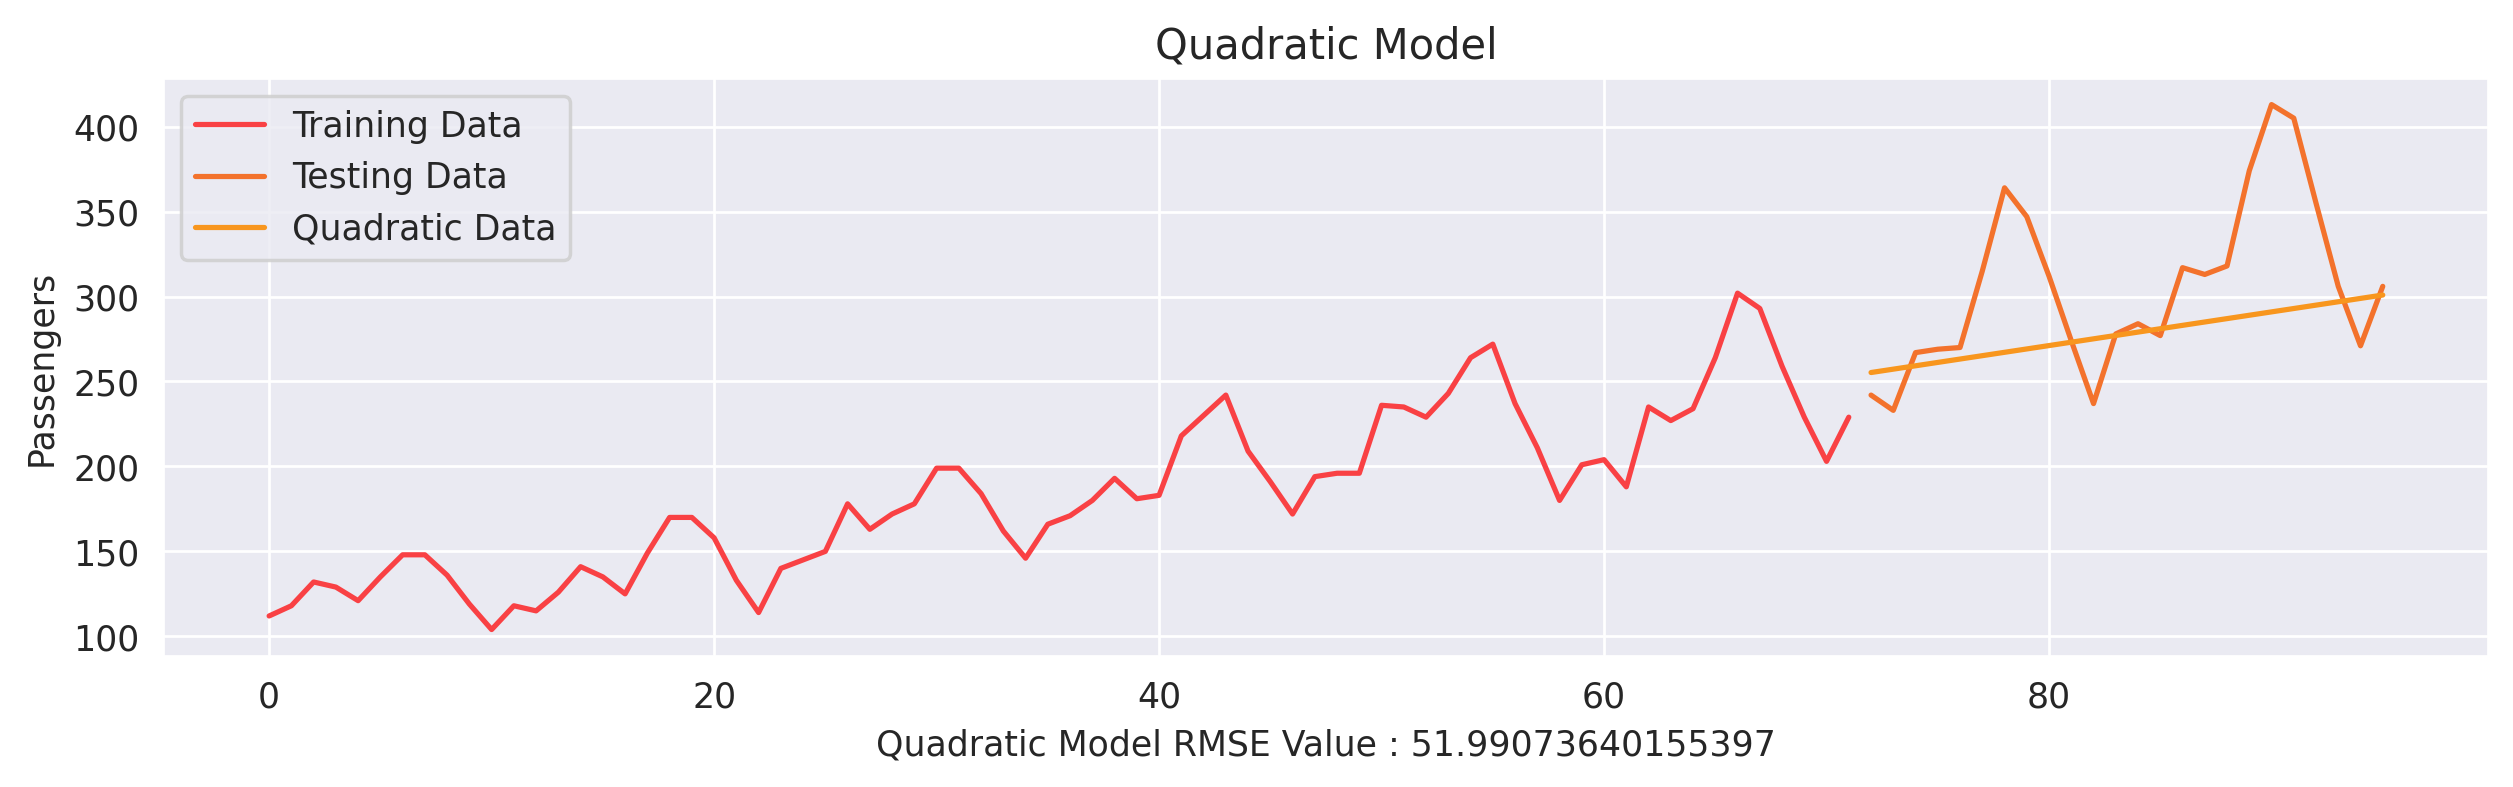

In [28]:
plt.title('Quadratic Model')
sns.lineplot(train['Passengers'], color = '#f94144', label = 'Training Data')
sns.lineplot(test['Passengers'], color = '#f3722c', label = 'Testing Data')
sns.lineplot(pred_linear, color = '#f8961e', label = 'Quadratic Data')
plt.xlabel('Quadratic Model RMSE Value : ' + str(rmse_Quad))

### Creating Additive Seasonality Model

In [29]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(mean_squared_error(test['Passengers'], pred_add_sea))

#### Evaluating The Model

Text(0.5, 0, 'Additive Seasonality RMSE Value : 127.26451565320342')

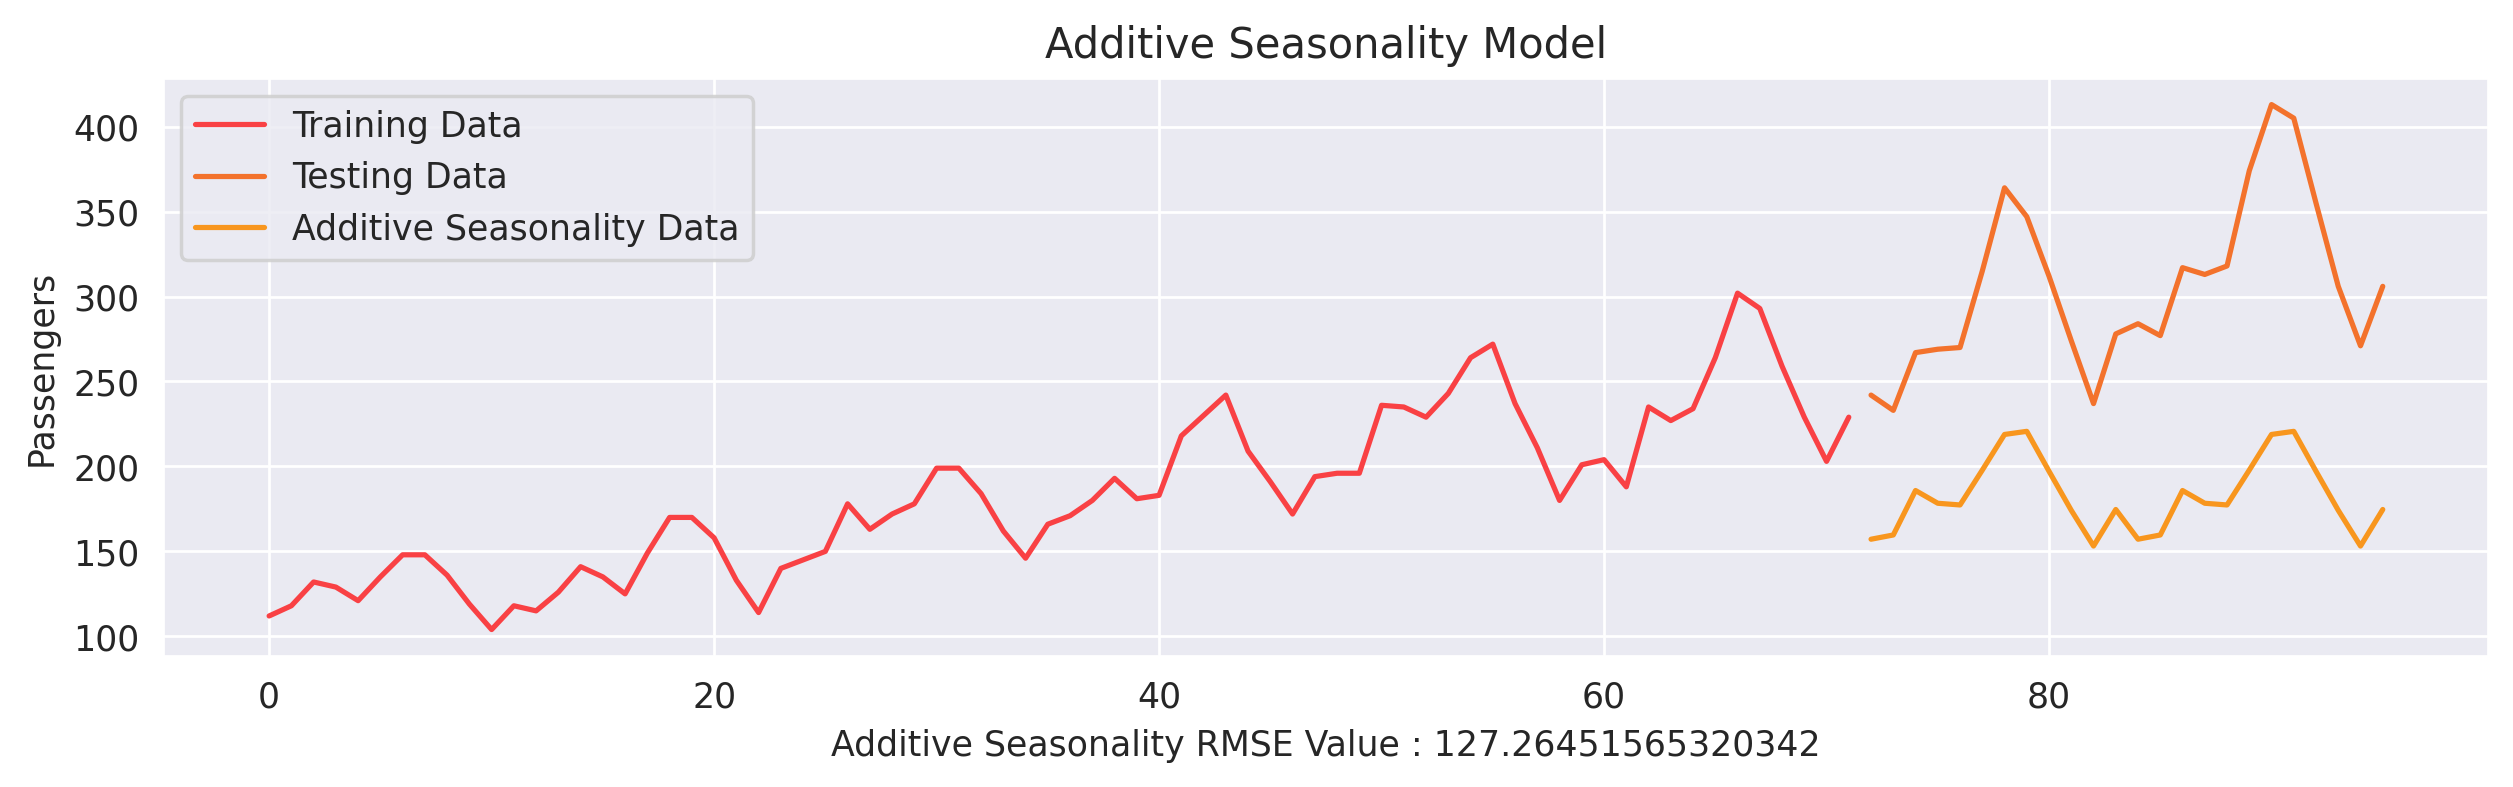

In [30]:
plt.title('Additive Seasonality Model')
sns.lineplot(train['Passengers'], color = '#f94144', label = 'Training Data')
sns.lineplot(test['Passengers'], color = '#f3722c', label = 'Testing Data')
sns.lineplot(pred_add_sea, color = '#f8961e', label = 'Additive Seasonality Data')
plt.xlabel('Additive Seasonality RMSE Value : ' + str(rmse_add_sea))

### Creating Additive Seasonality Quadratic  Model

In [31]:
add_sea_Quad = smf.ols('Passengers~t+squared_t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','squared_t']]))
rmse_add_sea_quad = np.sqrt(mean_squared_error(test['Passengers'], pred_add_sea_quad))

#### Evaluating The Model

Text(0.5, 0, 'Additive Seasonality Quadratic Model RMSE Value : 35.24160848594581')

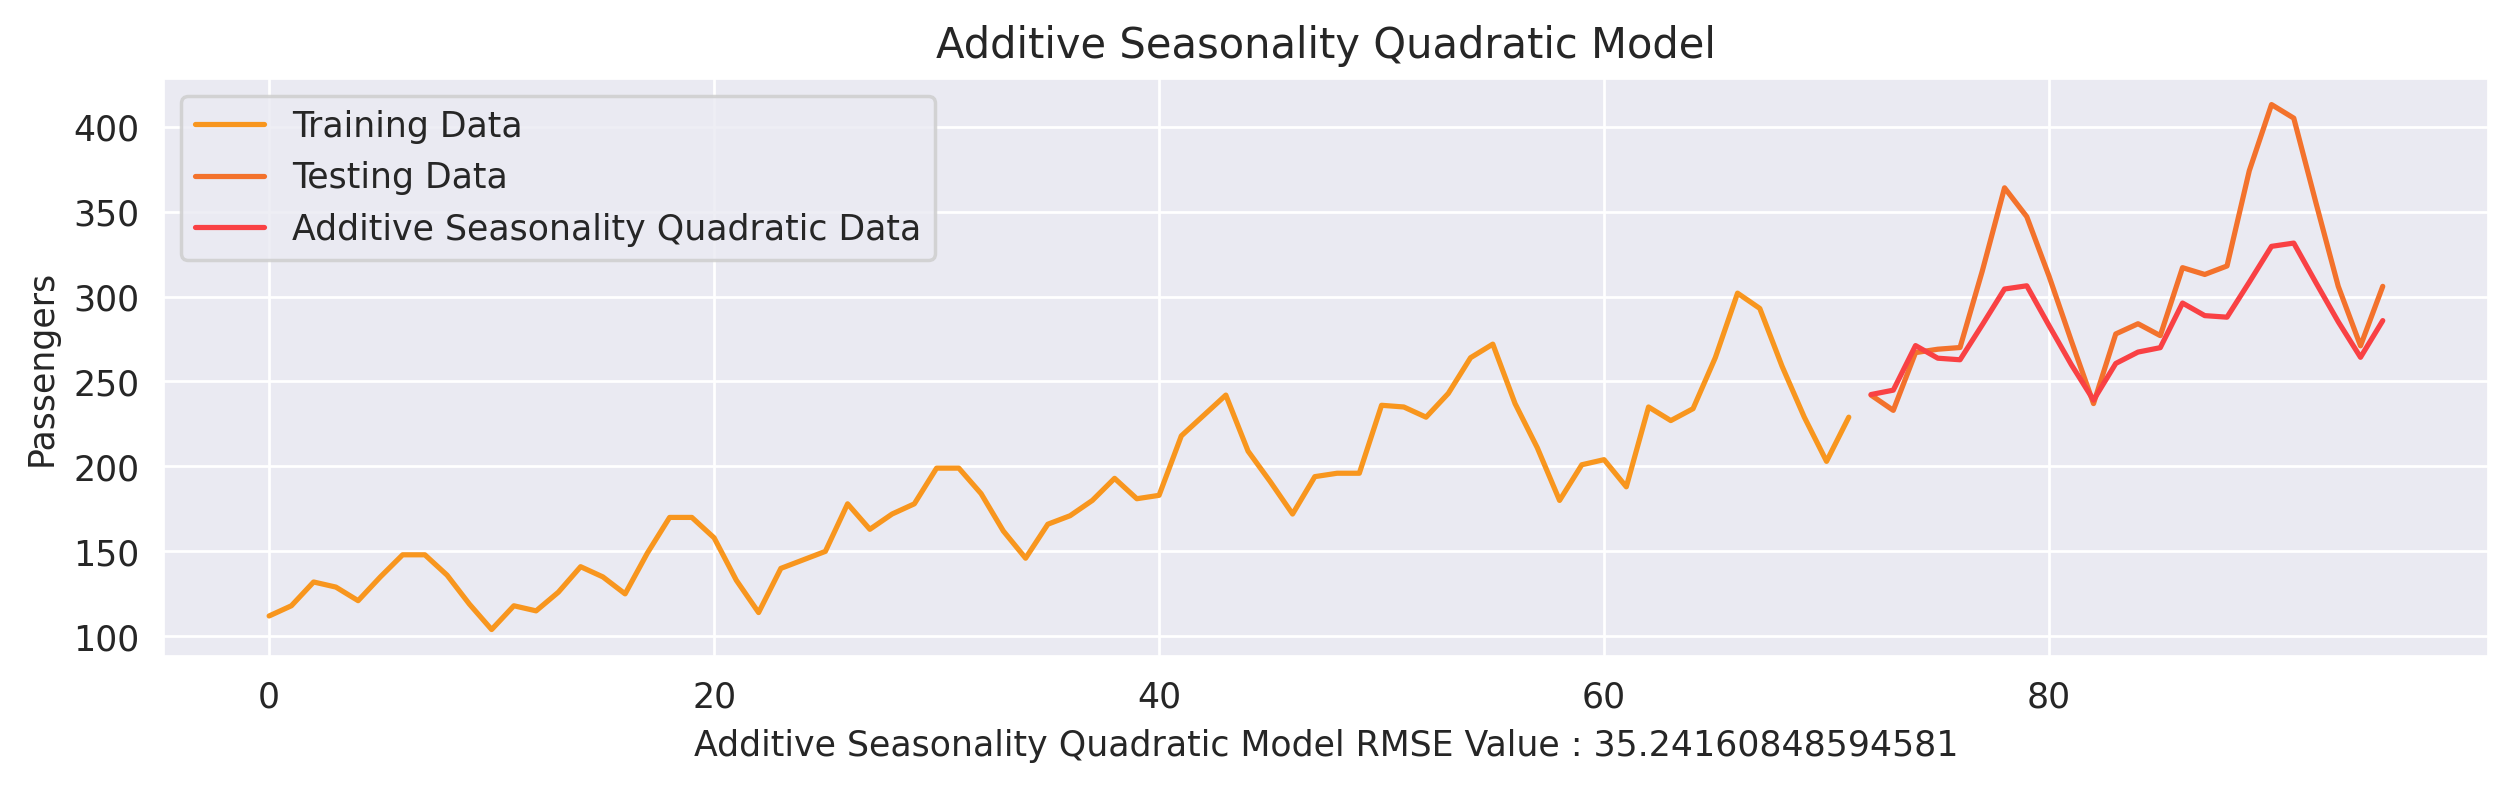

In [32]:
plt.title('Additive Seasonality Quadratic Model')
sns.lineplot(train['Passengers'], color = '#f8961e', label = 'Training Data')
sns.lineplot(test['Passengers'], color = '#f3722c', label = 'Testing Data')
sns.lineplot(pred_add_sea_quad, color = '#f94144', label = 'Additive Seasonality Quadratic Data')
plt.xlabel('Additive Seasonality Quadratic Model RMSE Value : ' + str(rmse_add_sea_quad))

### Creating Multiplicative Seasonality Model

In [33]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(mean_squared_error(test['Passengers'], pred_Mult_sea))

#### Evaluating The Model

Text(0.5, 0, 'Multiplicative Seasonality Model RMSE Value : 304.81913307091037')

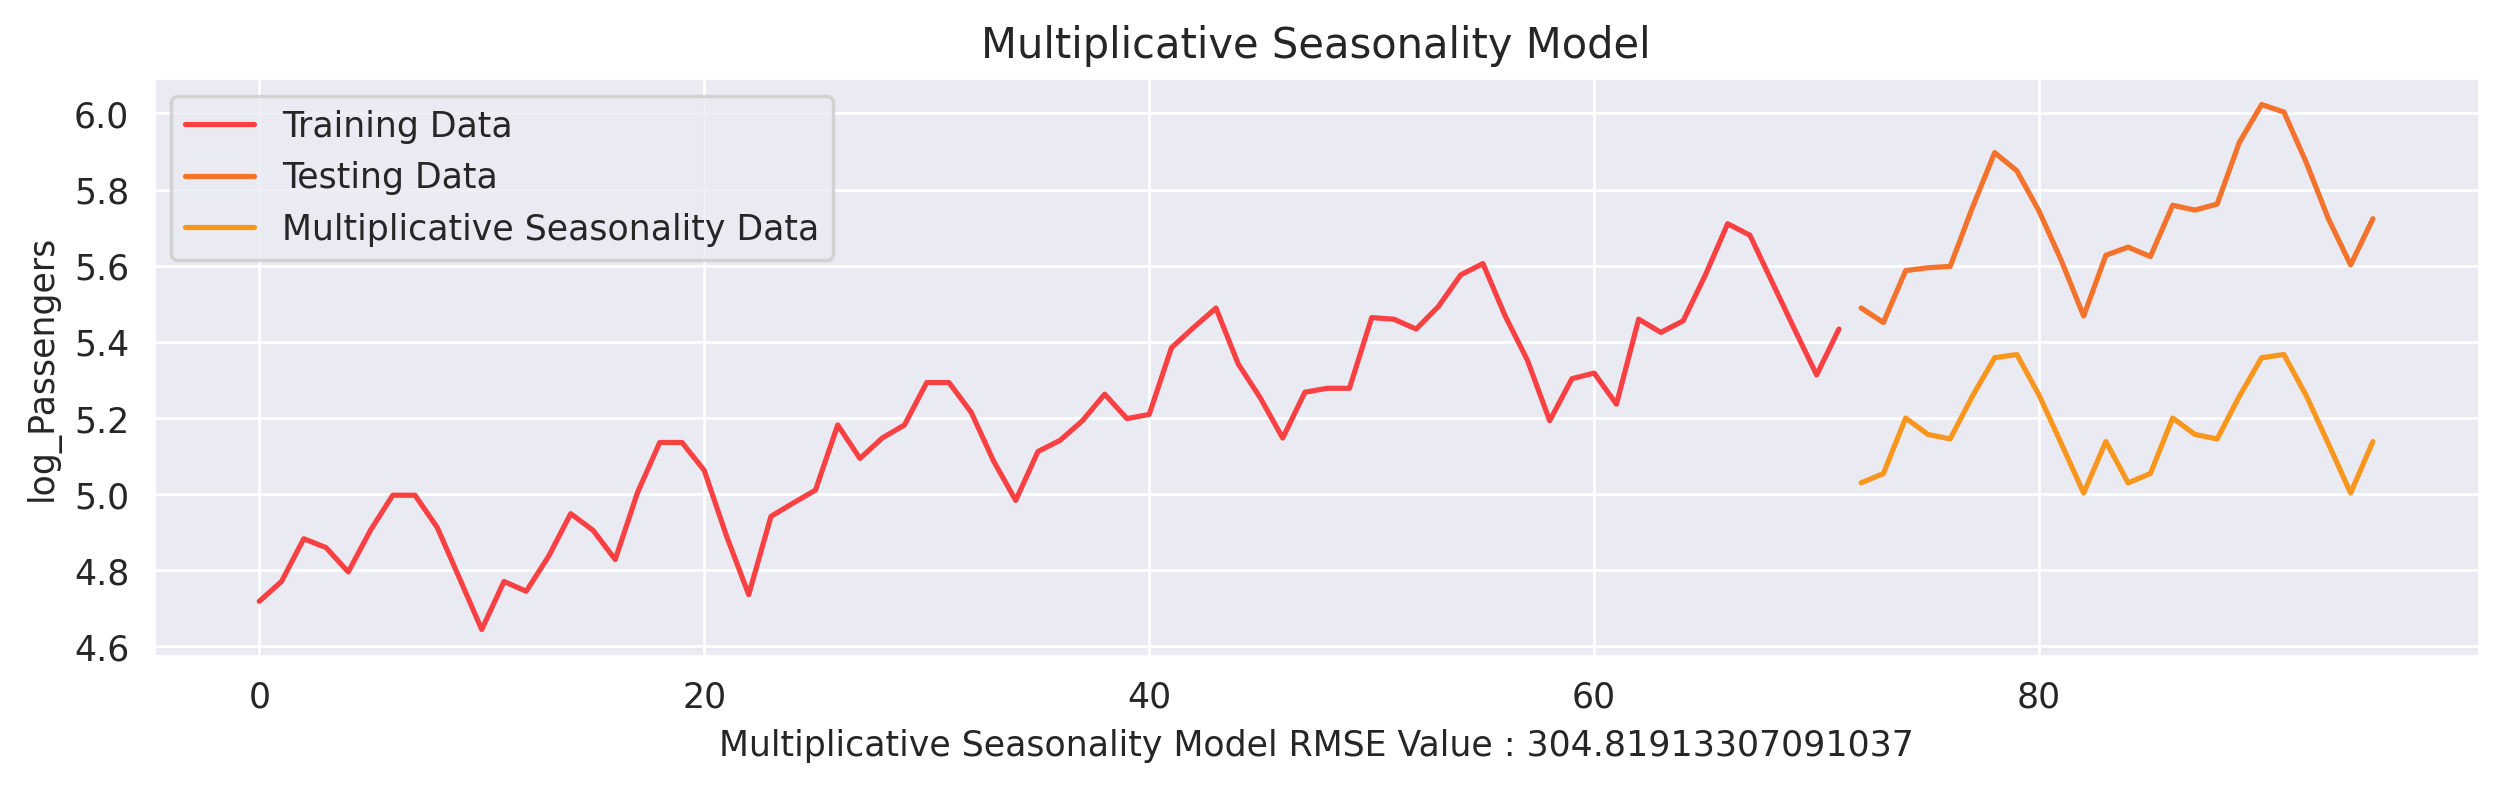

In [34]:
plt.title('Multiplicative Seasonality Model')
sns.lineplot(train['log_Passengers'], color = '#f94144', label = 'Training Data')
sns.lineplot(test['log_Passengers'], color = '#f3722c', label = 'Testing Data')
sns.lineplot(pred_Mult_sea, color = '#f8961e', label = 'Multiplicative Seasonality Data')
plt.xlabel('Multiplicative Seasonality Model RMSE Value : ' + str(rmse_Mult_sea))

### Creating Multiplicative addditive seasonality Model

In [35]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(mean_squared_error(test['Passengers'], pred_Mult_add_sea))

#### Evaluating The Model

Text(0.5, 0, 'Multiplicative addditive seasonality Model RMSE Value : 304.28038960808743')

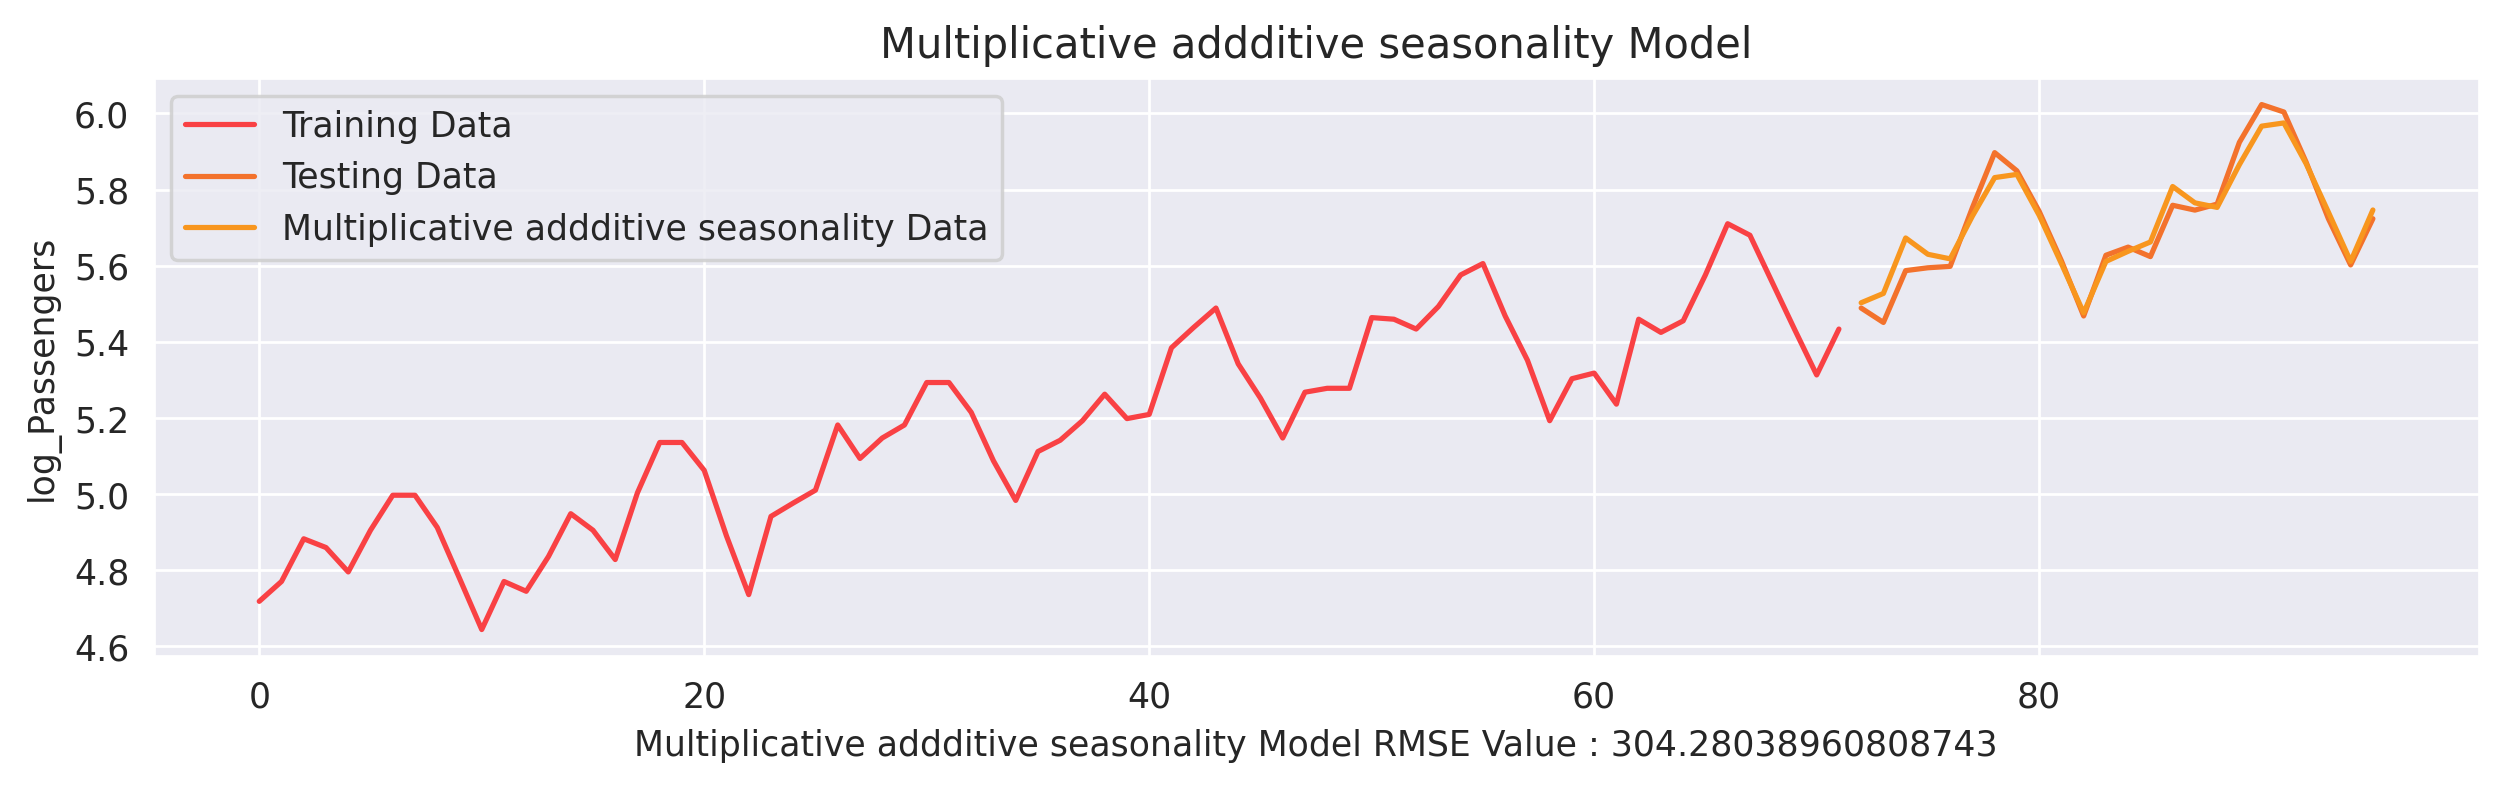

In [36]:
plt.title('Multiplicative addditive seasonality Model')
sns.lineplot(train['log_Passengers'], color = '#f94144', label = 'Training Data')
sns.lineplot(test['log_Passengers'], color = '#f3722c', label = 'Testing Data')
sns.lineplot(pred_Mult_add_sea, color = '#f8961e', label = 'Multiplicative addditive seasonality Data')
plt.xlabel('Multiplicative addditive seasonality Model RMSE Value : ' + str(rmse_Mult_add_sea))

### Comparing All Model

In [37]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)

#### Ploting Bar-Plot

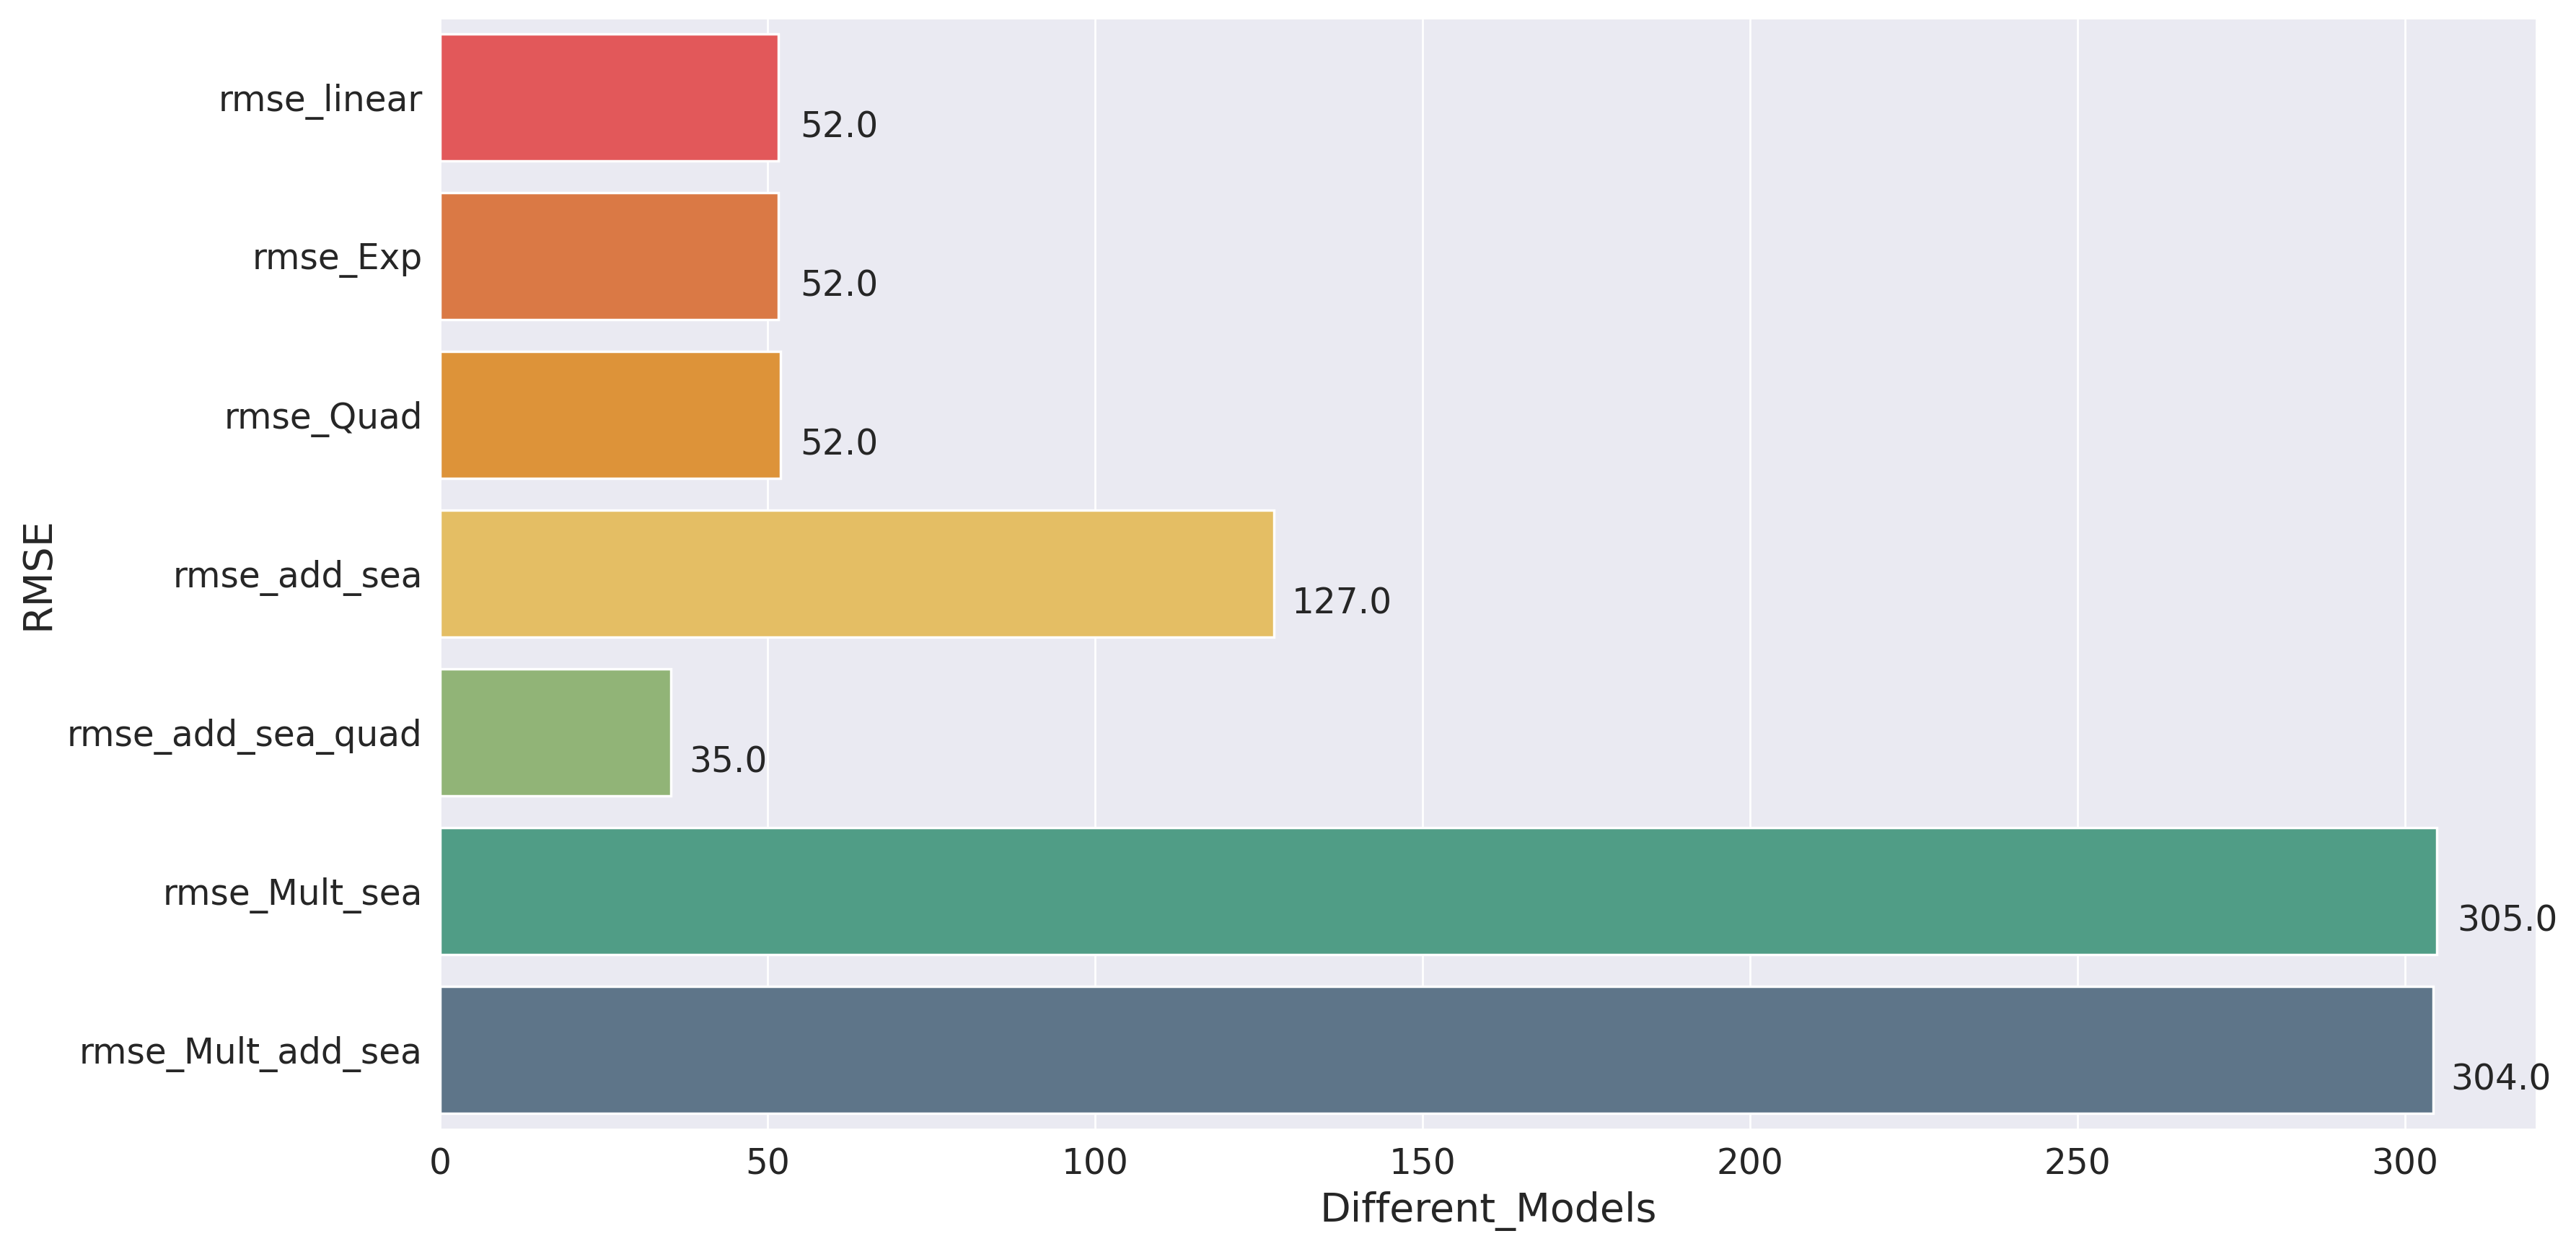

In [38]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
sns.barplot(x = 'RMSE_Values', y = 'MODEL', data = table_rmse, palette = ['#f94144', '#f3722c', '#f8961e', '#f9c74f', '#90be6d', '#43aa8b', '#577590'], ax = ax)
ax.set_xlabel('Different_Models', size=16)
ax.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_rmse.RMSE_Values.values,0)):
    ax.text(v + 3, i + .25, str(v), fontsize= 14)